# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [3]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")


In [5]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline


In [6]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [7]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [8]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import os


# Configuration
TAXI_DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/Assignment/trip_records'
HOURLY_SAMPLE_RATIO = 0.0076
SEED_VALUE = 42

# Change to data directory and get file list
os.chdir(TAXI_DATA_PATH)
taxi_files = os.listdir()

# Initialize empty dataframe for final results
df = pd.DataFrame()

# Process each file
for taxi_parquet_file in taxi_files:
    try:
        # Read current monthly file
        taxi_file_path = os.path.join(os.getcwd(), taxi_parquet_file)
        raw_taxi_data = pd.read_parquet(taxi_file_path)

        # Convert and extract datetime features
        raw_taxi_data['tpep_pickup_datetime'] = pd.to_datetime(raw_taxi_data['tpep_pickup_datetime'])
        raw_taxi_data['date'] = raw_taxi_data['tpep_pickup_datetime'].dt.date
        raw_taxi_data['hour'] = raw_taxi_data['tpep_pickup_datetime'].dt.hour

        # Initialize empty dataframe for current month's sampled data
        monthly_taxi_samples = pd.DataFrame()

        # Process each date and hour
        for single_date in raw_taxi_data['date'].unique():
            daily_trips = raw_taxi_data[raw_taxi_data['date'] == single_date]

            for current_hour in range(24):
                hourly_trips = daily_trips[daily_trips['hour'] == current_hour]

                # Sample data if hour contains records
                if not hourly_trips.empty:
                    sampled_trips = hourly_trips.sample(
                        frac=HOURLY_SAMPLE_RATIO,
                        random_state=SEED_VALUE
                    )
                    monthly_taxi_samples = pd.concat(
                        [monthly_taxi_samples, sampled_trips],
                        ignore_index=True
                    )

        # Add monthly samples to final dataframe
        df = pd.concat([df, monthly_taxi_samples], ignore_index=True)

        # Print progress
        print(f"Processed {taxi_parquet_file}")

    except Exception as e:
        print(f"Error processing file {taxi_parquet_file}: {e}")

print(f"Shape of the final sampled dataframe: {df.shape}")

Processed 2023-9.parquet
Processed 2023-5.parquet
Processed 2023-6.parquet
Processed 2023-2.parquet
Processed 2023-1.parquet
Processed 2023-8.parquet
Processed 2023-7.parquet
Processed 2023-10.parquet
Processed 2023-3.parquet
Processed 2023-12.parquet
Processed 2023-4.parquet
Processed 2023-11.parquet
Shape of the final sampled dataframe: (288237, 22)


In [12]:
df.shape

(288237, 22)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [13]:
# Store the df in csv/parquet
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Assignment/sample_data.csv')


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [14]:
# Load the new data file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment/sample_data.csv')

In [30]:
df.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0           0         2  2023-09-01 00:39:59   2023-09-01 01:00:28   
1           1         2  2023-09-01 00:24:50   2023-09-01 00:27:19   
2           2         2  2023-09-01 00:19:27   2023-09-01 01:04:02   
3           3         2  2023-09-01 00:42:13   2023-09-01 01:20:20   
4           4         2  2023-09-01 00:11:38   2023-09-01 00:17:56   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              NaN           4.71         NaN                NaN   
1              2.0           0.56         1.0                  N   
2              2.0          18.46         2.0                  N   
3              2.0          13.71         1.0                  N   
4              1.0           0.71         1.0                  N   

   PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
0           113           238  ...      0.5        4.32          0.00   
1           142           142  ...      0.5        0.00          0.00   
2           132           163  ...      0.5       15.71          6.94   
3           249           180  ...      0.5        0.00          0.00   
4           144           232  ...      0.5        2.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.15                   NaN          NaN   
1                    1.0         10.10                   2.5         0.00   
2                    1.0         98.40                   2.5         1.75   
3                    1.0         64.70                   2.5         0.00   
4                    1.0         14.90                   2.5         0.00   

         date  hour  airport_fee  
0  2023-09-01     0          NaN  
1  2023-09-01     0          NaN  
2  2023-09-01     0          NaN  
3  2023-09-01     0          NaN  
4  2023-09-01     0          NaN  

[5 rows x 23 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288237 entries, 0 to 288236
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             288237 non-null  int64  
 1   VendorID               288237 non-null  int64  
 2   tpep_pickup_datetime   288237 non-null  object 
 3   tpep_dropoff_datetime  288237 non-null  object 
 4   passenger_count        278634 non-null  float64
 5   trip_distance          288237 non-null  float64
 6   RatecodeID             278634 non-null  float64
 7   store_and_fwd_flag     278634 non-null  object 
 8   PULocationID           288237 non-null  int64  
 9   DOLocationID           288237 non-null  int64  
 10  payment_type           288237 non-null  int64  
 11  fare_amount            288237 non-null  float64
 12  extra                  288237 non-null  float64
 13  mta_tax                288237 non-null  float64
 14  tip_amount             288237 non-nu

In [16]:
df.dtypes #understanding the datatypes of the values in each column

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
Airport_fee              float64
date                      object
hour                       int64
airport_fee              float64
dtype: object

In [17]:
df.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'date', 'hour', 'airport_fee'],
      dtype='object')

In [18]:
df.nunique()

Unnamed: 0               288237
VendorID                      3
tpep_pickup_datetime     286498
tpep_dropoff_datetime    286503
passenger_count              10
trip_distance              2950
RatecodeID                    6
store_and_fwd_flag            2
PULocationID                244
DOLocationID                255
payment_type                  5
fare_amount                3984
extra                        40
mta_tax                       5
tip_amount                 2628
tolls_amount                290
improvement_surcharge         4
total_amount               9269
congestion_surcharge          3
Airport_fee                   4
date                        365
hour                         24
airport_fee                   2
dtype: int64

In [19]:
df.describe()

Unnamed: 0       VendorID  passenger_count  trip_distance  \
count  288237.000000  288237.000000    278634.000000  288237.000000   
mean   144118.000000       1.733369         1.367622       3.567502   
std     83206.999108       0.447502         0.891291      46.655683   
min         0.000000       1.000000         0.000000       0.000000   
25%     72059.000000       1.000000         1.000000       1.050000   
50%    144118.000000       2.000000         1.000000       1.800000   
75%    216177.000000       2.000000         1.000000       3.400000   
max    288236.000000       6.000000         9.000000   22528.820000   

          RatecodeID   PULocationID   DOLocationID   payment_type  \
count  278634.000000  288237.000000  288237.000000  288237.000000   
mean        1.655207     165.250686     163.944913       1.164937   
std         7.528081      64.051855      69.772195       0.506640   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000     132.000000     113.000000       1.000000   
50%         1.000000     162.000000     162.000000       1.000000   
75%         1.000000     234.000000     234.000000       1.000000   
max        99.000000     265.000000     265.000000       4.000000   

         fare_amount          extra        mta_tax     tip_amount  \
count  288237.000000  288237.000000  288237.000000  288237.000000   
mean       19.816194       1.586688       0.495335       3.545181   
std        18.189307       1.823964       0.048342       4.053190   
min         0.000000      -2.500000      -0.500000       0.000000   
25%         9.300000       0.000000       0.500000       1.000000   
50%        13.500000       1.000000       0.500000       2.840000   
75%        21.900000       2.500000       0.500000       4.420000   
max       910.000000      14.250000       0.800000     150.290000   

        tolls_amount  improvement_surcharge   total_amount  \
count  288237.000000          288237.000000  288237.000000   
mean        0.592219               0.998998      28.871798   
std         2.175470               0.030563      22.747618   
min         0.000000              -1.000000      -4.000000   
25%         0.000000               1.000000      15.960000   
50%         0.000000               1.000000      21.000000   
75%         0.000000               1.000000      30.800000   
max       143.000000               1.000000     911.000000   

       congestion_surcharge    Airport_fee           hour   airport_fee  
count         278634.000000  256059.000000  288237.000000  22575.000000  
mean               2.308440       0.145376      14.264543      0.109524  
std                0.665188       0.472378       5.807248      0.353433  
min               -2.500000      -1.750000       0.000000      0.000000  
25%                2.500000       0.000000      11.000000      0.000000  
50%                2.500000       0.000000      15.000000      0.000000  
75%                2.500000       0.000000      19.000000      0.000000  
max                2.500000       1.750000      23.000000      1.250000

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [20]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True) #resetting the index


Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0                0         2  2023-09-01 00:39:59   2023-09-01 01:00:28   
1                1         2  2023-09-01 00:24:50   2023-09-01 00:27:19   
2                2         2  2023-09-01 00:19:27   2023-09-01 01:04:02   
3                3         2  2023-09-01 00:42:13   2023-09-01 01:20:20   
4                4         2  2023-09-01 00:11:38   2023-09-01 00:17:56   
...            ...       ...                  ...                   ...   
288232      288232         2  2023-11-30 23:44:31   2023-12-01 00:02:25   
288233      288233         2  2023-11-30 23:49:28   2023-12-01 00:20:29   
288234      288234         2  2023-11-30 23:42:17   2023-11-30 23:54:19   
288235      288235         2  2023-11-30 23:34:28   2023-11-30 23:46:37   
288236      288236         2  2023-11-30 23:13:53   2023-11-30 23:18:32   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                   NaN           4.71         NaN                NaN   
1                   2.0           0.56         1.0                  N   
2                   2.0          18.46         2.0                  N   
3                   2.0          13.71         1.0                  N   
4                   1.0           0.71         1.0                  N   
...                 ...            ...         ...                ...   
288232              1.0           2.20         1.0                  N   
288233              2.0          18.13         2.0                  N   
288234              1.0           3.05         1.0                  N   
288235              1.0           2.02         1.0                  N   
288236              1.0           1.42         1.0                  N   

        PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
0                113           238  ...      0.5        4.32          0.00   
1                142           142  ...      0.5        0.00          0.00   
2                132           163  ...      0.5       15.71          6.94   
3                249           180  ...      0.5        0.00          0.00   
4                144           232  ...      0.5        2.00          0.00   
...              ...           ...  ...      ...         ...           ...   
288232            48           141  ...      0.5        5.50          0.00   
288233           132            48  ...      0.5        7.00          6.94   
288234            68           163  ...      0.5        0.00          0.00   
288235           233           246  ...      0.5        2.00          0.00   
288236            75            74  ...      0.5        2.08          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  \
0                         1.0         33.15                   NaN   
1                         1.0         10.10                   2.5   
2                         1.0         98.40                   2.5   
3                         1.0         64.70                   2.5   
4                         1.0         14.90                   2.5   
...                       ...           ...                   ...   
288232                    1.0         27.50                   2.5   
288233                    1.0         89.69                   2.5   
288234                    1.0         20.60                   2.5   
288235                    1.0         20.50                   2.5   
288236                    1.0         12.48                   0.0   

        Airport_fee        date  hour  airport_fee  
0               NaN  2023-09-01     0          NaN  
1              0.00  2023-09-01     0          NaN  
2              1.75  2023-09-01     0          NaN  
3              0.00  2023-09-01     0          NaN  
4              0.00  2023-09-01     0          NaN  
...             ...         ...   ...          ...  
288232         0.00  2023-11-30    23          NaN  
288233         1.75  2023-11-30    23   

In [21]:
df.columns.tolist()

['Unnamed: 0',
 'VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'date',
 'hour',
 'airport_fee']

In [22]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [23]:
df.shape

(288237, 22)

In [24]:
df.drop('date',axis=1,inplace=True) #droping date and hour columns as well they were created during sampling.
df.drop('hour',axis=1,inplace=True)

In [25]:

 df.shape

(288237, 20)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [26]:
df['Airport_fee'].unique()

array([  nan,  0.  ,  1.75,  1.25, -1.75])

In [27]:
df['airport_fee'].unique()

array([ nan, 1.25, 0.  ])

In [28]:
# Combine the two airport fee columns
df['Airport_fee'] = df['Airport_fee'].fillna(df['airport_fee']) ## Combining the values: filling the missing values (NaN) in the column 'Airport_fee' using values from other column 'airport_fee', row by row.


In [29]:
df['Airport_fee'].unique()

array([  nan,  0.  ,  1.75,  1.25, -1.75])

In [30]:
print(df['Airport_fee'].isna().sum()) #checking the number of missing values still exists in the combined column


9603


In [31]:
df.drop('airport_fee',axis=1,inplace=True) # dropping redundant column 'airport_fee"


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288237 entries, 0 to 288236
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               288237 non-null  int64  
 1   tpep_pickup_datetime   288237 non-null  object 
 2   tpep_dropoff_datetime  288237 non-null  object 
 3   passenger_count        278634 non-null  float64
 4   trip_distance          288237 non-null  float64
 5   RatecodeID             278634 non-null  float64
 6   store_and_fwd_flag     278634 non-null  object 
 7   PULocationID           288237 non-null  int64  
 8   DOLocationID           288237 non-null  int64  
 9   payment_type           288237 non-null  int64  
 10  fare_amount            288237 non-null  float64
 11  extra                  288237 non-null  float64
 12  mta_tax                288237 non-null  float64
 13  tip_amount             288237 non-null  float64
 14  tolls_amount           288237 non-nu

In [33]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-09-01 00:39:59   2023-09-01 01:00:28              NaN   
1         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
2         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
3         2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
4         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           4.71         NaN                NaN           113           238   
1           0.56         1.0                  N           142           142   
2          18.46         2.0                  N           132           163   
3          13.71         1.0                  N           249           180   
4           0.71         1.0                  N           144           232   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             0        24.83    0.0      0.5        4.32          0.00   
1             2         5.10    1.0      0.5        0.00          0.00   
2             1        70.00    0.0      0.5       15.71          6.94   
3             4        59.70    1.0      0.5        0.00          0.00   
4             1         7.90    1.0      0.5        2.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         33.15                   NaN          NaN  
1                    1.0         10.10                   2.5         0.00  
2                    1.0         98.40                   2.5         1.75  
3                    1.0         64.70                   2.5         0.00  
4                    1.0         14.90                   2.5         0.00

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [34]:
# check where values of fare amount are negative
numbercols = df.select_dtypes(include='number').columns
print(numbercols)

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')


In [35]:
cols_with_fares = ["fare_amount", "extra" , "mta_tax", "tip_amount",  "tolls_amount", 'improvement_surcharge', "total_amount",  "congestion_surcharge", "Airport_fee"]

In [36]:
#checking with negative values
# Find rows with negative fares
mask_negative = df[cols_with_fares].lt(0)  # .lt(0) is more explicit than < 0
negative_fares = df[mask_negative.any(axis=1)]

# Display results
negative_fares

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
49498          2  2023-04-12 19:12:27   2023-04-12 19:37:09              1.0   
71145          2  2023-03-08 15:51:33   2023-03-08 15:52:12              1.0   
141639         2  2023-05-09 17:05:56   2023-05-09 17:24:59              1.0   
155195         2  2023-05-19 14:53:56   2023-05-19 14:54:03              1.0   
187815         2  2023-10-27 14:51:03   2023-10-27 14:51:11              1.0   
212128         2  2023-06-25 05:59:41   2023-06-25 06:08:22              2.0   
216487         2  2023-06-30 21:37:09   2023-06-30 21:46:00              2.0   
240475         2  2023-12-29 17:32:20   2023-12-29 17:33:49              1.0   
243061         2  2023-08-02 16:04:37   2023-08-02 16:04:44              2.0   
265508         2  2023-11-03 15:51:42   2023-11-03 15:53:00              1.0   
268337         2  2023-11-06 19:30:44   2023-11-06 19:38:21              1.0   
282979         2  2023-11-22 15:44:42   2023-11-22 15:45:57              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
49498            3.61         1.0                  N            68   
71145            0.00         1.0                  N           231   
141639           8.35         1.0                  N           132   
155195           0.00         1.0                  N           193   
187815           0.00         1.0                  N           265   
212128           1.09         2.0                  N            90   
216487           1.38         2.0                  N           249   
240475           0.02         1.0                  N           161   
243061           0.01         2.0                  N           237   
265508           0.21         2.0                  N           246   
268337           0.48         1.0                  N            75   
282979           0.05         2.0                  N           132   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
49498            232             2          0.0    0.0     -0.5         0.0   
71145            231             2          0.0    0.0     -0.5         0.0   
141639           222             2          0.0    0.0     -0.5         0.0   
155195           193             2          0.0    0.0     -0.5         0.0   
187815           265             2          3.0   -2.5      0.0         0.0   
212128           170             2          0.0    0.0     -0.5         0.0   
216487           186             2          0.0    0.0     -0.5         0.0   
240475           161             2          0.0    0.0     -0.5         0.0   
243061           237             2          0.0    0.0     -0.5         0.0   
265508           246             2          0.0    0.0     -0.5         0.0   
268337            75             2          0.0    0.0     -0.5         0.0   
282979           132             4          0.0    0.0     -0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
49498            0.0                   -1.0         -4.00   
71145            0.0                   -1.0         -1.50   
141639           0.0                   -1.0         -3.25   
155195           0.0                   -1.0         -1.50   
187815           0.0                    1.0          4.00   
212128           0.0                   -1.0         -4.00   
216487           0.0                   -1.0         -4.00   
240475           0.0                   -1.0         -4.00   
243061           0.0                   -1.0         -4.00   
265508           0.0                   -1.0         -4.00   
268337           0.0                   -1.0         -1.50   
282979           0.0                   -1.0         -3.25   

        congestion_surcharge  Airport_fee  
49498                   -2.5         0.00  
71145                    0.0         0.00  
141639                   0.0        -1.75  
155195                   0.0         0.00  
187815        

In [37]:
negative_fares.shape

(12, 19)

:Did you notice something different in the `RatecodeID` column for above records?

In [38]:
# Analyse RatecodeID for the negative fare amounts

negative_fares["RatecodeID"].value_counts() #to summarize the count of negative fare amounts associated with each RatecodeID

#58% of negative fares are under RateCode 1.0 and rest with 2.0



RatecodeID
1.0    7
2.0    5
Name: count, dtype: int64

In [39]:
# Find which columns have negative values
negative_values = (df[cols_with_fares] < 0).sum()
print(negative_values[negative_values > 0])

extra                     1
mta_tax                  11
improvement_surcharge    11
total_amount             11
congestion_surcharge      6
Airport_fee               2
dtype: int64


In [40]:
# fix these negative values
df[cols_with_fares] = df [cols_with_fares].abs()


In [41]:
negative_values = (df[cols_with_fares] < 0).sum()
print(negative_values[negative_values > 0])

Series([], dtype: int64)


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [42]:
# Find the proportion of missing values in each column
null_value_counts= df.isnull().sum()
null_value_counts[null_value_counts>0]
#So by this we can see each column has 8831 missing values

passenger_count         9603
RatecodeID              9603
store_and_fwd_flag      9603
congestion_surcharge    9603
Airport_fee             9603
dtype: int64

In [44]:
missing_proportion = (df.isnull().sum() / len(df)) * 100
print(missing_proportion)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.331633
trip_distance            0.000000
RatecodeID               3.331633
store_and_fwd_flag       3.331633
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.331633
Airport_fee              3.331633
dtype: float64


In [43]:
missing_values = null_value_counts / len(df)
print(missing_values[missing_values > 0]*100)

passenger_count         3.331633
RatecodeID              3.331633
store_and_fwd_flag      3.331633
congestion_surcharge    3.331633
Airport_fee             3.331633
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [45]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df[df["passenger_count"].isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-09-01 00:39:59   2023-09-01 01:00:28              NaN   
47             1  2023-09-01 05:41:17   2023-09-01 05:51:07              NaN   
77             2  2023-09-01 07:44:46   2023-09-01 07:58:24              NaN   
100            2  2023-09-01 08:45:22   2023-09-01 08:50:41              NaN   
137            1  2023-09-01 10:09:37   2023-09-01 10:29:11              NaN   
...          ...                  ...                   ...              ...   
288184         1  2023-11-30 22:06:01   2023-11-30 22:57:54              NaN   
288188         2  2023-11-30 23:02:25   2023-11-30 23:17:41              NaN   
288199         2  2023-11-30 23:37:00   2023-12-01 00:07:00              NaN   
288219         1  2023-11-30 23:57:07   2023-12-01 00:08:00              NaN   
288231         2  2023-11-30 23:36:36   2023-11-30 23:42:17              NaN   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                4.71         NaN                NaN           113   
47               0.00         NaN                NaN           143   
77               2.57         NaN                NaN           224   
100              0.52         NaN                NaN           162   
137              0.00         NaN                NaN            48   
...               ...         ...                ...           ...   
288184           5.40         NaN                NaN           261   
288188           3.06         NaN                NaN            68   
288199           7.86         NaN                NaN            48   
288219           0.00         NaN                NaN           161   
288231           0.86         NaN                NaN           232   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                238             0        24.83    0.0      0.5        4.32   
47                75             0        14.53    0.0      0.5        0.00   
77               140             0        17.01    0.0      0.5        0.00   
100              161             0        11.88    0.0      0.5        2.00   
137              236             0        25.00    0.0      0.5        4.35   
...              ...           ...          ...    ...      ...         ...   
288184           142             0        38.00    1.0      0.5        8.60   
288188           231             0        22.85    0.0      0.5        0.00   
288199           243             0        31.27    0.0      0.5        5.00   
288219           143             0        11.79    0.0      0.5        0.00   
288231            79             0         8.08    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
0                0.0                    1.0         33.15   
47               0.0                    1.0         18.53   
77               0.0                    1.0         21.01   
100              0.0                    1.0         17.88   
137              0.0                    1.0         35.35   
...              ...                    ...           ...   
288184           0.0                    1.0         51.60   
288188           0.0                    1.0         26.85   
288199           0.0                    1.0         40.27   
288219           0.0                    1.0         15.79   
288231           0.0                    1.0         12.08   

        congestion_surcharge  Airport_fee  
0                        NaN          NaN  
47                       NaN          NaN  
77                       NaN          NaN  
100                      NaN          NaN  
137                      NaN          NaN  
...                      ...          ...  
288184                   NaN          NaN  
288188                   NaN          NaN  
288199                   NaN          NaN  
288219                   NaN          NaN  
288231                   NaN          Na

In [46]:
print("passenger count median-",df["passenger_count"].median(),"\n","passenger count mode-",df["passenger_count"].mode()[0])


passenger count median- 1.0 
 passenger count mode- 1.0


In [47]:
df["passenger_count"].fillna(df["passenger_count"].mode()[0], inplace=True)


In [48]:
df[df["passenger_count"].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

Did you find zeroes in passenger_count? Handle these.

In [49]:
zero_count = (df["passenger_count"] == 0).sum()
print(f"Number of zeroes in passenger_count: {zero_count}")

Number of zeroes in passenger_count: 4422


In [50]:
df["passenger_count"].replace(0, df["passenger_count"].mode()[0], inplace=True)

In [51]:
df[df["passenger_count"].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [52]:
zero_count = (df["passenger_count"] == 0).sum()
print(f"Number of zeroes in passenger_count: {zero_count}")

Number of zeroes in passenger_count: 0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [53]:
# Fix missing values in 'RatecodeID'
df["RatecodeID"].isnull().sum()

np.int64(9603)

In [54]:
df["RatecodeID"].fillna(df["RatecodeID"].mode()[0], inplace=True)

In [55]:
df[df["RatecodeID"].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [56]:
# handle null values in congestion_surcharge
df["congestion_surcharge"].isnull().sum()



np.int64(9603)

In [57]:
df["congestion_surcharge"].fillna(df["congestion_surcharge"].median(), inplace=True)

In [58]:
df[df["congestion_surcharge"].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [59]:
# Handle any remaining missing values

df.isnull().sum()


VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
store_and_fwd_flag       9603
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
Airport_fee              9603
dtype: int64

In [60]:
df["store_and_fwd_flag"].isnull().sum()

np.int64(9603)

In [61]:
df["store_and_fwd_flag"].fillna(df["store_and_fwd_flag"].mode()[0], inplace=True)

In [62]:
df[df["store_and_fwd_flag"].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [63]:
df['Airport_fee'] = df['Airport_fee'].fillna(0)

In [64]:
df.isnull().sum() # by this all nulls are fixed..

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [65]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()

VendorID  passenger_count  trip_distance     RatecodeID  \
count  288237.000000    288237.000000  288237.000000  288237.000000   
mean        1.733369         1.370716       3.567502       1.633378   
std         0.447502         0.863599      46.655683       7.402548   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.800000       1.000000   
75%         2.000000         1.000000       3.400000       1.000000   
max         6.000000         9.000000   22528.820000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  288237.000000  288237.000000  288237.000000  288237.000000   
mean      165.250686     163.944913       1.164937      19.816194   
std        64.051855      69.772195       0.506640      18.189307   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.000000     113.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      21.900000   
max       265.000000     265.000000       4.000000     910.000000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  288237.000000  288237.000000  288237.000000  288237.000000   
mean        1.586705       0.495373       3.545181       0.592219   
std         1.823949       0.047950       4.053190       2.175470   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.840000       0.000000   
75%         2.500000       0.500000       4.420000       0.000000   
max        14.250000       0.800000     150.290000     143.000000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          288237.000000  288237.000000         288237.000000   
mean                0.999074      28.872041              2.314927   
std                 0.027957      22.747310              0.654548   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      30.800000              2.500000   
max                 1.000000     911.000000              2.500000   

         Airport_fee  
count  288237.000000  
mean        0.137749  
std         0.456895  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.750000

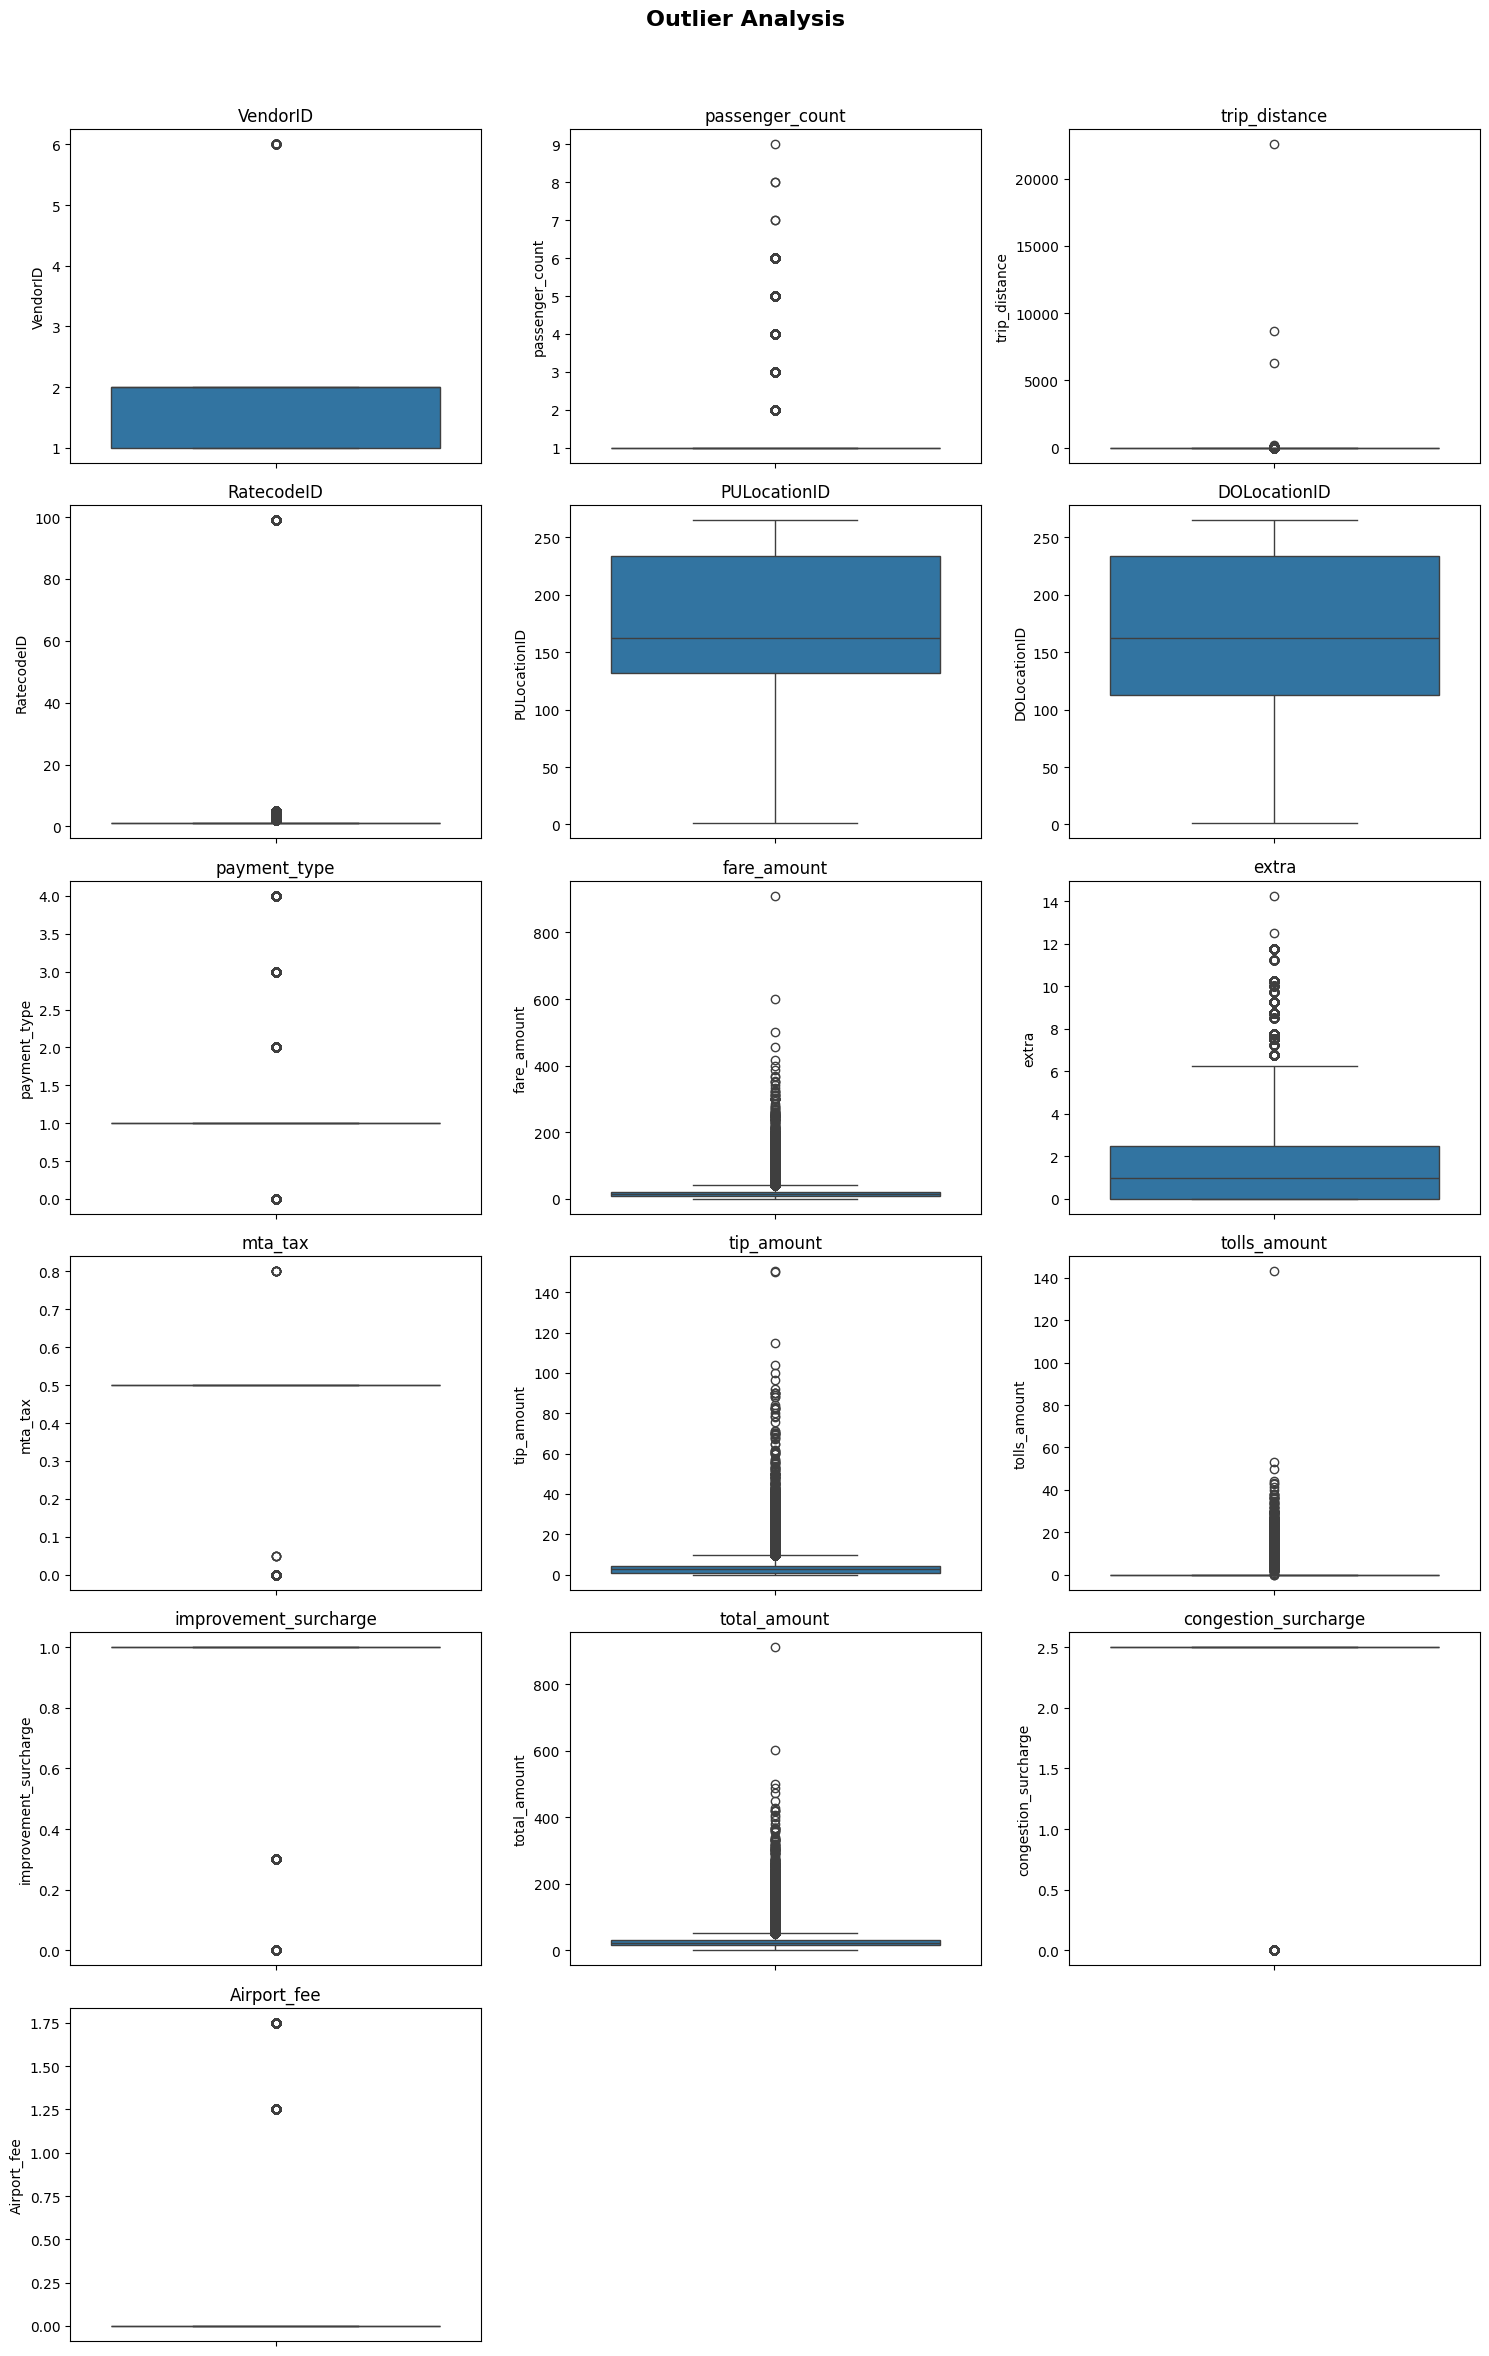

In [66]:
# Get numeric columns and calculate grid dimensions
numeric_data = df.select_dtypes(include=['number'])
num_columns = len(numeric_data.columns)
plots_per_row = 3
num_rows = (num_columns // plots_per_row) + (num_columns % plots_per_row > 0)

# Create figure and axes
fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(15, num_rows * 4))
fig.suptitle("Outlier Analysis", fontsize=16, fontweight='bold')
axes_flat = axes.flatten()

# Create boxplots for each numeric column
[sns.boxplot(data=numeric_data[column], ax=axes_flat[idx]).set(title=column, xlabel='', ylabel=column)
 for idx, column in enumerate(numeric_data.columns)]

# Remove empty subplots and adjust layout
[fig.delaxes(axes_flat[idx]) for idx in range(num_columns, len(axes_flat))]
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [67]:
(df['passenger_count'] > 6).sum()

np.int64(5)

In [87]:
df[df['passenger_count'] > 6]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
13903          2  2023-09-18 13:07:26   2023-09-18 14:05:27              8.0   
37036          2  2023-02-19 17:19:13   2023-02-19 17:57:24              9.0   
52249          2  2023-04-09 09:22:54   2023-04-09 09:23:22              7.0   
163043         2  2023-05-29 02:35:04   2023-05-29 02:35:16              7.0   
287298         2  2023-11-30 00:13:36   2023-11-30 00:13:39              8.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
13903           31.71         5.0                  N            48   
37036           16.79         5.0                  N           186   
52249            0.00         5.0                  N           125   
163043           0.00         5.0                  N           256   
287298           0.00         5.0                  N            90   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
13903            219             1         88.9    0.0      0.5       10.00   
37036              1             1         90.0    0.0      0.0       18.00   
52249            125             1         80.0    0.0      0.5        0.00   
163043           256             1         75.0    0.0      0.0        0.02   
287298           264             1         86.0    0.0      0.5        5.00   

        tolls_amount  improvement_surcharge  total_amount  \
13903          11.19                    1.0        114.09   
37036          14.75                    1.0        123.75   
52249          21.25                    1.0        105.25   
163043          0.00                    1.0         76.02   
287298          0.00                    1.0         92.50   

        congestion_surcharge  Airport_fee  
13903                    2.5          0.0  
37036                    0.0          0.0  
52249                    2.5          0.0  
163043                   0.0          0.0  
287298                   0.0          0.0

In [68]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [69]:
df[df['passenger_count'] > 6]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [70]:
# Continue with outlier handling
df.describe()


VendorID  passenger_count  trip_distance     RatecodeID  \
count  288232.000000    288232.000000  288232.000000  288232.000000   
mean        1.733364         1.370604       3.567395       1.633320   
std         0.447505         0.863186      46.656050       7.402599   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.800000       1.000000   
75%         2.000000         1.000000       3.400000       1.000000   
max         6.000000         6.000000   22528.820000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  288232.000000  288232.000000  288232.000000  288232.000000   
mean      165.251107     163.944756       1.164940      19.815081   
std        64.051607      69.771567       0.506644      18.187486   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.000000     113.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      21.900000   
max       265.000000     265.000000       4.000000     910.000000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  288232.000000  288232.000000  288232.000000  288232.000000   
mean        1.586733       0.495377       3.545128       0.592066   
std         1.823952       0.047932       4.053107       2.174898   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.840000       0.000000   
75%         2.500000       0.500000       4.420000       0.000000   
max        14.250000       0.800000     150.290000     143.000000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          288232.000000  288232.000000         288232.000000   
mean                0.999074      28.870767              2.314949   
std                 0.027957      22.745343              0.654511   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      30.800000              2.500000   
max                 1.000000     911.000000              2.500000   

         Airport_fee  
count  288232.000000  
mean        0.137751  
std         0.456898  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.750000

In [71]:
# Entries where trip_distance ≈ 0 and fare_amount > 300

high_fare_zero_distance = (df['trip_distance'].lt(0.1)) & (df['fare_amount'].gt(300))
print(f"Total entries where trip_distance ≈ 0 and fare_amount > 300: {high_fare_zero_distance.sum()}")
df[high_fare_zero_distance]

Total entries where trip_distance ≈ 0 and fare_amount > 300: 6


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
27665          1  2023-02-09 07:37:30   2023-02-09 07:39:13              1.0   
47981          2  2023-04-05 21:16:43   2023-04-05 21:25:57              1.0   
208778         2  2023-06-21 12:05:21   2023-06-21 12:05:42              1.0   
215727         2  2023-06-29 20:56:07   2023-06-29 20:56:15              1.0   
222885         2  2023-12-07 23:39:43   2023-12-07 23:39:59              1.0   
238846         2  2023-12-24 14:01:07   2023-12-24 14:01:44              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
27665             0.0         5.0                  N           246   
47981             0.0         5.0                  N           265   
208778            0.0         5.0                  N           265   
215727            0.0         5.0                  N           265   
222885            0.0         5.0                  N           265   
238846            0.0         5.0                  N            14   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
27665            246             4        910.0    0.0      0.0         0.0   
47981            265             2        600.0    0.0      0.0         0.0   
208778           265             2        500.0    0.0      0.0         0.0   
215727           265             1        350.0    0.0      0.0        70.2   
222885           265             2        319.0    0.0      0.0         0.0   
238846            14             1        417.0    0.0      0.0         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
27665            0.0                    1.0         911.0   
47981            0.0                    1.0         601.0   
208778           0.0                    1.0         501.0   
215727           0.0                    1.0         421.2   
222885           0.0                    1.0         320.0   
238846           0.0                    1.0         418.0   

        congestion_surcharge  Airport_fee  
27665                    0.0          0.0  
47981                    0.0          0.0  
208778                   0.0          0.0  
215727                   0.0          0.0  
222885                   0.0          0.0  
238846                   0.0          0.0

In [72]:
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

In [73]:
df[((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [74]:
# Entrieswhere trip_distance = 0 & fare_amount =0, but pickup and dropoff locations are different
df[((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
21509          1  2023-02-01 08:20:36   2023-02-01 08:20:36              6.0   
21855          2  2023-02-01 16:53:34   2023-02-01 16:54:13              1.0   
65998          2  2023-04-28 13:52:30   2023-04-28 14:43:03              1.0   
140796         1  2023-05-02 17:42:04   2023-05-02 17:42:04              1.0   
232732         1  2023-12-18 09:31:12   2023-12-18 09:31:12              1.0   
234612         1  2023-12-20 13:40:27   2023-12-20 13:40:27              1.0   
238504         1  2023-12-27 20:51:43   2023-12-27 21:00:02              3.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
21509             0.0        99.0                  Y           145   
21855             0.0         1.0                  N           193   
65998             0.0         1.0                  N           264   
140796            0.0         5.0                  N            75   
232732            0.0         5.0                  Y           138   
234612            0.0         5.0                  Y           138   
238504            0.0         5.0                  N           132   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
21509            264             2          0.0   0.00      0.0         0.0   
21855              7             1          0.0   0.00      0.0         0.0   
65998            255             2          0.0   0.00      0.5         0.0   
140796           264             2          0.0   0.00      0.0         0.0   
232732           264             3          0.0   0.00      0.0         0.0   
234612           264             2          0.0   9.25      0.0         0.0   
238504           215             4          0.0   1.75      0.0         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
21509            0.0                    0.0          0.00   
21855            0.0                    0.0          0.00   
65998            0.0                    1.0          5.75   
140796           0.0                    0.0          0.00   
232732           0.0                    0.0          0.00   
234612           0.0                    1.0         10.25   
238504           0.0                    1.0          2.75   

        congestion_surcharge  Airport_fee  
21509                    0.0         0.00  
21855                    0.0         0.00  
65998                    2.5         1.75  
140796                   0.0         0.00  
232732                   0.0         0.00  
234612                   2.5         1.75  
238504                   0.0         1.75

In [75]:
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

In [76]:
df[((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [77]:
# Records with trip_distance greater than 250 miles
df[df['trip_distance'] >250]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
34199          2  2023-02-17 07:17:00   2023-02-17 07:25:00              1.0   
37226          2  2023-02-19 22:06:00   2023-02-19 22:22:00              1.0   
202064         2  2023-06-13 09:59:00   2023-06-13 10:12:00              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
34199         8645.77         1.0                  N           238   
37226         6284.45         1.0                  N           186   
202064       22528.82         1.0                  N           116   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
34199            230             0        13.34    0.0      0.5        4.34   
37226            236             0        16.00    0.0      0.5        0.00   
202064           239             0        17.42    0.0      0.5        0.37   

        tolls_amount  improvement_surcharge  total_amount  \
34199            0.0                    1.0         21.68   
37226            0.0                    1.0         20.00   
202064           0.0                    1.0         21.79   

        congestion_surcharge  Airport_fee  
34199                    2.5          0.0  
37226                    2.5          0.0  
202064                   2.5          0.0

In [78]:
df = df[df['trip_distance'] <= 250]

In [79]:
df[df['trip_distance'] >250]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [80]:
#Records with Payment type 0
df[df['payment_type'] == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-09-01 00:39:59   2023-09-01 01:00:28              1.0   
47             1  2023-09-01 05:41:17   2023-09-01 05:51:07              1.0   
77             2  2023-09-01 07:44:46   2023-09-01 07:58:24              1.0   
100            2  2023-09-01 08:45:22   2023-09-01 08:50:41              1.0   
137            1  2023-09-01 10:09:37   2023-09-01 10:29:11              1.0   
...          ...                  ...                   ...              ...   
288184         1  2023-11-30 22:06:01   2023-11-30 22:57:54              1.0   
288188         2  2023-11-30 23:02:25   2023-11-30 23:17:41              1.0   
288199         2  2023-11-30 23:37:00   2023-12-01 00:07:00              1.0   
288219         1  2023-11-30 23:57:07   2023-12-01 00:08:00              1.0   
288231         2  2023-11-30 23:36:36   2023-11-30 23:42:17              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                4.71         1.0                  N           113   
47               0.00         1.0                  N           143   
77               2.57         1.0                  N           224   
100              0.52         1.0                  N           162   
137              0.00         1.0                  N            48   
...               ...         ...                ...           ...   
288184           5.40         1.0                  N           261   
288188           3.06         1.0                  N            68   
288199           7.86         1.0                  N            48   
288219           0.00         1.0                  N           161   
288231           0.86         1.0                  N           232   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                238             0        24.83    0.0      0.5        4.32   
47                75             0        14.53    0.0      0.5        0.00   
77               140             0        17.01    0.0      0.5        0.00   
100              161             0        11.88    0.0      0.5        2.00   
137              236             0        25.00    0.0      0.5        4.35   
...              ...           ...          ...    ...      ...         ...   
288184           142             0        38.00    1.0      0.5        8.60   
288188           231             0        22.85    0.0      0.5        0.00   
288199           243             0        31.27    0.0      0.5        5.00   
288219           143             0        11.79    0.0      0.5        0.00   
288231            79             0         8.08    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
0                0.0                    1.0         33.15   
47               0.0                    1.0         18.53   
77               0.0                    1.0         21.01   
100              0.0                    1.0         17.88   
137              0.0                    1.0         35.35   
...              ...                    ...           ...   
288184           0.0                    1.0         51.60   
288188           0.0                    1.0         26.85   
288199           0.0                    1.0         40.27   
288219           0.0                    1.0         15.79   
288231           0.0                    1.0         12.08   

        congestion_surcharge  Airport_fee  
0                        2.5          0.0  
47                       2.5          0.0  
77                       2.5          0.0  
100                      2.5          0.0  
137                      2.5          0.0  
...                      ...          ...  
288184                   2.5          0.0  
288188                   2.5          0.0  
288199                   2.5          0.0  
288219                   2.5          0.0  
288231                   2.5          0.

In [81]:
df[df['payment_type'] == 0].describe()

VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
count  9600.000000           9600.0    9600.000000      9600.0   9600.000000   
mean      1.637917              1.0       3.408724         1.0    160.496667   
std       0.610479              0.0       4.238731         0.0     72.087324   
min       1.000000              1.0       0.000000         1.0      1.000000   
25%       1.000000              1.0       0.500000         1.0    107.000000   
50%       2.000000              1.0       2.100000         1.0    161.000000   
75%       2.000000              1.0       4.402500         1.0    234.000000   
max       6.000000              1.0      34.030000         1.0    265.000000   

       DOLocationID  payment_type  fare_amount        extra      mta_tax  \
count   9600.000000        9600.0  9600.000000  9600.000000  9600.000000   
mean     155.710208           0.0    22.415649     0.166437     0.494010   
std       70.868365           0.0    14.107857     0.729177     0.054399   
min        1.000000           0.0     0.000000     0.000000     0.000000   
25%      107.000000           0.0    12.920000     0.000000     0.500000   
50%      151.000000           0.0    18.580000     0.000000     0.500000   
75%      231.000000           0.0    27.560000     0.000000     0.500000   
max      265.000000           0.0   196.820000     9.250000     0.500000   

        tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  9600.000000   9600.000000            9600.000000   9600.000000   
mean      2.721643      0.605985               0.991313     29.662798   
std       3.415791      2.264547               0.083891     17.521151   
min       0.000000      0.000000               0.000000      0.000000   
25%       0.000000      0.000000               1.000000     18.880000   
50%       2.000000      0.000000               1.000000     24.590000   
75%       4.030000      0.000000               1.000000     34.700000   
max      40.000000     25.000000               1.000000    215.570000   

       congestion_surcharge  Airport_fee  
count                9600.0       9600.0  
mean                    2.5          0.0  
std                     0.0          0.0  
min                     2.5          0.0  
25%                     2.5          0.0  
50%                     2.5          0.0  
75%                     2.5          0.0  
max                     2.5          0.0

In [82]:
#Dropping rows where trip_distance == 0 and fare_amount == 0
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0))]

In [83]:
df[((df['payment_type'] == 0) &(df['trip_distance'] == 0) & (df['fare_amount'] == 0))]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [84]:
df[df['payment_type'] == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-09-01 00:39:59   2023-09-01 01:00:28              1.0   
47             1  2023-09-01 05:41:17   2023-09-01 05:51:07              1.0   
77             2  2023-09-01 07:44:46   2023-09-01 07:58:24              1.0   
100            2  2023-09-01 08:45:22   2023-09-01 08:50:41              1.0   
137            1  2023-09-01 10:09:37   2023-09-01 10:29:11              1.0   
...          ...                  ...                   ...              ...   
288184         1  2023-11-30 22:06:01   2023-11-30 22:57:54              1.0   
288188         2  2023-11-30 23:02:25   2023-11-30 23:17:41              1.0   
288199         2  2023-11-30 23:37:00   2023-12-01 00:07:00              1.0   
288219         1  2023-11-30 23:57:07   2023-12-01 00:08:00              1.0   
288231         2  2023-11-30 23:36:36   2023-11-30 23:42:17              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                4.71         1.0                  N           113   
47               0.00         1.0                  N           143   
77               2.57         1.0                  N           224   
100              0.52         1.0                  N           162   
137              0.00         1.0                  N            48   
...               ...         ...                ...           ...   
288184           5.40         1.0                  N           261   
288188           3.06         1.0                  N            68   
288199           7.86         1.0                  N            48   
288219           0.00         1.0                  N           161   
288231           0.86         1.0                  N           232   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                238             0        24.83    0.0      0.5        4.32   
47                75             0        14.53    0.0      0.5        0.00   
77               140             0        17.01    0.0      0.5        0.00   
100              161             0        11.88    0.0      0.5        2.00   
137              236             0        25.00    0.0      0.5        4.35   
...              ...           ...          ...    ...      ...         ...   
288184           142             0        38.00    1.0      0.5        8.60   
288188           231             0        22.85    0.0      0.5        0.00   
288199           243             0        31.27    0.0      0.5        5.00   
288219           143             0        11.79    0.0      0.5        0.00   
288231            79             0         8.08    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
0                0.0                    1.0         33.15   
47               0.0                    1.0         18.53   
77               0.0                    1.0         21.01   
100              0.0                    1.0         17.88   
137              0.0                    1.0         35.35   
...              ...                    ...           ...   
288184           0.0                    1.0         51.60   
288188           0.0                    1.0         26.85   
288199           0.0                    1.0         40.27   
288219           0.0                    1.0         15.79   
288231           0.0                    1.0         12.08   

        congestion_surcharge  Airport_fee  
0                        2.5          0.0  
47                       2.5          0.0  
77                       2.5          0.0  
100                      2.5          0.0  
137                      2.5          0.0  
...                      ...          ...  
288184                   2.5          0.0  
288188                   2.5          0.0  
288199                   2.5          0.0  
288219                   2.5          0.0  
288231                   2.5          0.

In [85]:
#Assign the most common valid payment_type to these rows:
most_common_payment = df.loc[df['payment_type'] != 0, 'payment_type'].mode()[0]
df['payment_type'].replace(0, most_common_payment, inplace=True)

In [86]:
df[df['payment_type'] == 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [87]:
# Do any columns need standardising?
df[df['tolls_amount']>100] #Handling high toll amounts

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
60971         1  2023-04-20 18:45:45   2023-04-20 18:46:08              1.0   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
60971            0.0         1.0                  Y           265   

       DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
60971           265             1          3.0    2.5      0.5         5.0   

       tolls_amount  improvement_surcharge  total_amount  \
60971         143.0                    1.0         155.0   

       congestion_surcharge  Airport_fee  
60971                   0.0          0.0

In [88]:
df = df[df['tolls_amount']<100]

In [89]:
df[df['tolls_amount']>100]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [90]:
df[df['RatecodeID']>6]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
60             1  2023-09-01 06:39:37   2023-09-01 07:14:57              1.0   
105            1  2023-09-01 09:44:39   2023-09-01 10:13:27              1.0   
168            1  2023-09-01 11:12:06   2023-09-01 12:29:16              1.0   
373            1  2023-09-01 16:28:10   2023-09-01 16:51:45              1.0   
457            1  2023-09-01 18:17:02   2023-09-01 19:45:38              1.0   
...          ...                  ...                   ...              ...   
287446         1  2023-11-30 09:26:01   2023-11-30 10:20:06              1.0   
287459         1  2023-11-30 09:47:57   2023-11-30 10:12:30              1.0   
287504         1  2023-11-30 10:34:17   2023-11-30 11:39:31              1.0   
287567         1  2023-11-30 12:53:19   2023-11-30 13:46:10              1.0   
287747         1  2023-11-30 15:22:11   2023-11-30 16:42:13              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
60                6.1        99.0                  N            63   
105               4.3        99.0                  N            39   
168              17.4        99.0                  N            33   
373               3.7        99.0                  N            95   
457               8.0        99.0                  N            65   
...               ...         ...                ...           ...   
287446            4.3        99.0                  N           225   
287459            5.0        99.0                  N            10   
287504           17.8        99.0                  N            75   
287567            5.1        99.0                  N            49   
287747            0.0        99.0                  N           246   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
60               181             1         27.5    0.0      0.5         0.0   
105               61             1         24.5    0.0      0.5         0.0   
168               86             1         77.5    0.0      0.5         0.0   
373               63             1         26.5    0.0      0.5         0.0   
457              222             1         29.5    0.0      0.5         0.0   
...              ...           ...          ...    ...      ...         ...   
287446            76             1         24.5    0.0      0.5         0.0   
287459            95             1         26.5    0.0      0.5         0.0   
287504            39             1         58.5    0.0      0.5         0.0   
287567            77             1         23.5    0.0      0.5         0.0   
287747           130             1         40.5    0.0      0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
60              0.00                    1.0         29.00   
105             0.00                    1.0         26.00   
168             0.00                    1.0         79.00   
373             0.00                    1.0         28.00   
457             0.00                    1.0         31.00   
...              ...                    ...           ...   
287446          0.00                    1.0         26.00   
287459          0.00                    1.0         28.00   
287504          6.94                    1.0         66.94   
287567          0.00                    1.0         25.00   
287747          6.94                    1.0         48.94   

        congestion_surcharge  Airport_fee  
60                       0.0          0.0  
105                      0.0          0.0  
168                      0.0          0.0  
373                      0.0          0.0  
457                      0.0          0.0  
...                      ...          ...  
287446                   0.0          0.0  
287459                   0.0          0.0  
287504                   0.0          0.0  
287567                   0.0          0.0  
287747                   0.0          0.

In [91]:
# Find the mode (most common value) of RatecodeID
most_common_ratecode = df.loc[df['RatecodeID'] <= 6, 'RatecodeID'].mode()[0]

# Replace RatecodeID values greater than 6 with the mode
df.loc[df['RatecodeID'] > 6, 'RatecodeID'] = most_common_ratecode

In [92]:
df.describe()

VendorID  passenger_count  trip_distance     RatecodeID  \
count  288179.000000    288179.000000  288179.000000  288179.000000   
mean        1.733398         1.370624       3.438066       1.071435   
std         0.447488         0.863159       4.520115       0.385010   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.800000       1.000000   
75%         2.000000         1.000000       3.400000       1.000000   
max         6.000000         6.000000     187.350000       5.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  288179.000000  288179.000000  288179.000000  288179.000000   
mean      165.247124     163.938406       1.198116      19.807810   
std        64.050522      69.769987       0.459371      18.023077   
min         1.000000       1.000000       1.000000       0.000000   
25%       132.000000     113.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      21.900000   
max       265.000000     265.000000       4.000000     455.200000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  288179.000000  288179.000000  288179.000000  288179.000000   
mean        1.586955       0.495443       3.545350       0.591678   
std         1.823921       0.047589       4.050749       2.158846   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.840000       0.000000   
75%         2.500000       0.500000       4.420000       0.000000   
max        14.250000       0.800000     150.290000      53.000000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          288179.000000  288179.000000         288179.000000   
mean                0.999171      28.863980              2.315314   
std                 0.026168      22.612265              0.653916   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      30.800000              2.500000   
max                 1.000000     488.700000              2.500000   

         Airport_fee  
count  288179.000000  
mean        0.137736  
std         0.456873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.750000

In [93]:
df[df['tip_amount']>100]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
6061           1  2023-09-09 01:04:43   2023-09-09 01:28:40              3.0   
121821         1  2023-07-09 12:08:25   2023-07-09 12:39:10              3.0   
197182         1  2023-06-07 13:58:40   2023-06-07 14:05:58              1.0   
223524         2  2023-12-08 17:40:34   2023-12-08 19:18:35              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
6061             4.60         1.0                  N            79   
121821          10.30         5.0                  N           231   
197182           1.50         1.0                  N            13   
223524          54.45         4.0                  N           162   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
6061              80             1         26.1    3.5      0.5      150.00   
121821           265             1          0.0    0.0      0.0      115.00   
197182            87             1         10.0    2.5      0.5      150.29   
223524           265             1        332.7    2.5      0.5      103.84   

        tolls_amount  improvement_surcharge  total_amount  \
6061            0.00                    1.0        181.10   
121821         21.75                    1.0        137.75   
197182          0.00                    1.0        164.29   
223524          6.94                    1.0        449.98   

        congestion_surcharge  Airport_fee  
6061                     2.5          0.0  
121821                   0.0          0.0  
197182                   2.5          0.0  
223524                   2.5          0.0

In [94]:
df[df['fare_amount'] <= 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
7747           1  2023-09-11 08:55:41   2023-09-11 08:57:14              1.0   
9456           2  2023-09-13 08:41:37   2023-09-13 08:53:16              1.0   
16383          2  2023-09-25 00:12:38   2023-09-25 01:07:42              1.0   
20863          1  2023-09-30 13:22:42   2023-09-30 13:33:41              1.0   
26446          1  2023-02-07 16:06:43   2023-02-07 16:08:06              1.0   
33653          1  2023-02-16 14:48:44   2023-02-16 14:53:22              1.0   
37038          1  2023-02-19 17:16:38   2023-02-19 17:16:59              1.0   
39833          1  2023-02-24 14:22:52   2023-02-24 14:26:24              1.0   
46874          1  2023-04-10 15:37:59   2023-04-10 15:40:22              1.0   
48147          2  2023-04-11 07:37:23   2023-04-11 08:15:38              1.0   
49498          2  2023-04-12 19:12:27   2023-04-12 19:37:09              1.0   
54550          1  2023-04-13 10:21:11   2023-04-13 11:35:13              1.0   
61260          1  2023-04-20 23:59:40   2023-04-21 00:52:12              1.0   
64944          1  2023-04-27 11:59:34   2023-04-27 12:56:02              1.0   
71181          1  2023-03-08 15:40:28   2023-03-08 17:05:56              1.0   
74492          1  2023-03-06 16:51:00   2023-03-06 17:00:23              1.0   
75867          1  2023-03-10 09:27:56   2023-03-10 09:54:47              3.0   
91198          1  2023-03-25 02:10:25   2023-03-25 02:10:50              1.0   
92847          1  2023-03-30 23:20:54   2023-03-30 23:21:12              1.0   
100997         1  2023-01-11 16:47:59   2023-01-11 18:09:08              1.0   
105617         1  2023-01-17 15:23:25   2023-01-17 15:46:25              1.0   
115799         2  2023-01-30 15:47:07   2023-01-30 16:11:33              1.0   
119923         1  2023-07-06 16:09:14   2023-07-06 16:25:41              1.0   
121821         1  2023-07-09 12:08:25   2023-07-09 12:39:10              3.0   
123786         1  2023-07-12 09:50:16   2023-07-12 10:24:45              1.0   
131463         2  2023-07-22 02:54:09   2023-07-22 03:13:48              1.0   
135379         1  2023-07-27 13:11:48   2023-07-27 13:12:40              1.0   
136564         2  2023-07-28 21:19:11   2023-07-28 21:25:05              1.0   
138863         2  2023-05-01 09:38:07   2023-05-01 10:20:01              1.0   
141639         2  2023-05-09 17:05:56   2023-05-09 17:24:59              1.0   
152024         1  2023-05-16 10:07:00   2023-05-16 11:12:39              1.0   
155018         1  2023-05-19 11:16:33   2023-05-19 11:49:15              1.0   
156851         2  2023-05-21 10:20:00   2023-05-21 10:34:00              1.0   
158420         1  2023-05-23 11:03:03   2023-05-23 11:07:15              1.0   
160390         2  2023-05-25 14:33:37   2023-05-25 15:21:23              1.0   
162522         2  2023-05-28 10:58:03   2023-05-28 11:08:40              1.0   
175598         1  2023-10-12 16:42:29   2023-10-12 17:40:45              1.0   
197238         1  2023-06-07 14:55:11   2023-06-07 14:57:31              1.0   
202066         2  2023-06-13 09:22:44   2023-06-13 09:31:41              1.0   
212128         2  2023-06-25 05:59:41   2023-06-25 06:08:22              2.0   
215643         2  2023-06-29 19:37:01   2023-06-29 19:38:36              1.0   
216487         2  2023-06-30 21:37:09   2023-06-30 21:46:00              2.0   
220167         1  2023-12-05 09:07:28   2023-12-05 09:07:56              1.0   
234068         1  2023-12-19 19:25:04   2023-12-19 19:25:53              1.0   
240475         2  2023-12-29 17:32:20   2023-12-29 17:33:49              1.0   
243061         2  2023-08-02 16:04:37   2023-08-02 16:04:44              2.0   
254189         1  2023-08-18 14:57:27   2023-08-18 14:58:10              1.0   
259718         1  2023-08-26 20:08:42   2023-08-26 20:14:44              1.0   
260574         1  2023-08-28 09:29:47   2023-08-28 09:56:44              1.0   
265508  

In [95]:
#Impute fare_amount == 0 for trips with trip_distance > 0
# Calculate median fare per mile
median_fare_per_mile = df[df['fare_amount'] > 0].groupby('trip_distance')['fare_amount'].median()

# Apply imputation
df.loc[(df['fare_amount'] == 0) & (df['trip_distance'] > 0), 'fare_amount'] = \
    df['trip_distance'].map(median_fare_per_mile)

In [96]:
df[df['fare_amount'] <= 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [97]:
df[df['fare_amount'] >500]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [98]:
df.describe()

VendorID  passenger_count  trip_distance     RatecodeID  \
count  288179.000000    288179.000000  288179.000000  288179.000000   
mean        1.733398         1.370624       3.438066       1.071435   
std         0.447488         0.863159       4.520115       0.385010   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.800000       1.000000   
75%         2.000000         1.000000       3.400000       1.000000   
max         6.000000         6.000000     187.350000       5.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  288179.000000  288179.000000  288179.000000  288176.000000   
mean      165.247124     163.938406       1.198116      19.811754   
std        64.050522      69.769987       0.459371      18.023269   
min         1.000000       1.000000       1.000000       0.010000   
25%       132.000000     113.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      21.900000   
max       265.000000     265.000000       4.000000     455.200000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  288179.000000  288179.000000  288179.000000  288179.000000   
mean        1.586955       0.495443       3.545350       0.591678   
std         1.823921       0.047589       4.050749       2.158846   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.840000       0.000000   
75%         2.500000       0.500000       4.420000       0.000000   
max        14.250000       0.800000     150.290000      53.000000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          288179.000000  288179.000000         288179.000000   
mean                0.999171      28.863980              2.315314   
std                 0.026168      22.612265              0.653916   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      30.800000              2.500000   
max                 1.000000     488.700000              2.500000   

         Airport_fee  
count  288179.000000  
mean        0.137736  
std         0.456873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.750000

In [99]:
df.shape

(288179, 19)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [100]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical? - ALL ARE NUMERICAL


* `fare_amount`: Numerical
* `extra`: Numerical
* `mta_tax`: Numerical
* `tip_amount`: Numerical
* `tolls_amount`: Numerical
* `improvement_surcharge`: Numerical
* `total_amount`: Numerical
* `congestion_surcharge`: Numerical
* `airport_fee`: Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

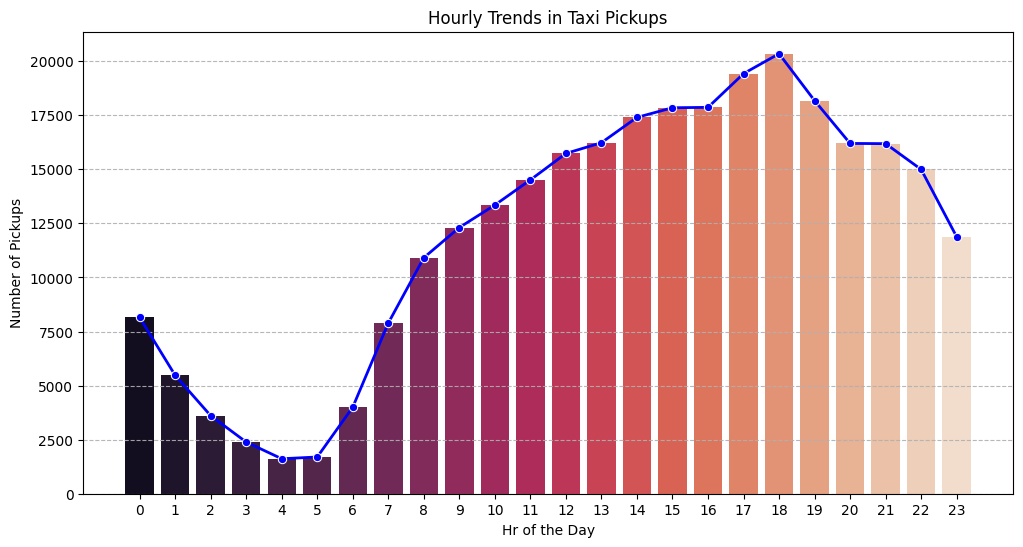

In [101]:
# Create and display hourly trend plot
plt.figure(figsize=(12,6))
hourly_data = df.assign(pickup_hour=pd.to_datetime(df['tpep_pickup_datetime']).dt.hour).groupby('pickup_hour').size()
ax = sns.barplot(x=hourly_data.index, y=hourly_data.values, palette="rocket")
sns.lineplot(x=hourly_data.index, y=hourly_data.values, color='blue', marker='o', linewidth=2)
ax.set(xlabel='Hr of the Day', ylabel='Number of Pickups', title='Hourly Trends in Taxi Pickups', xticks=range(24))
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()

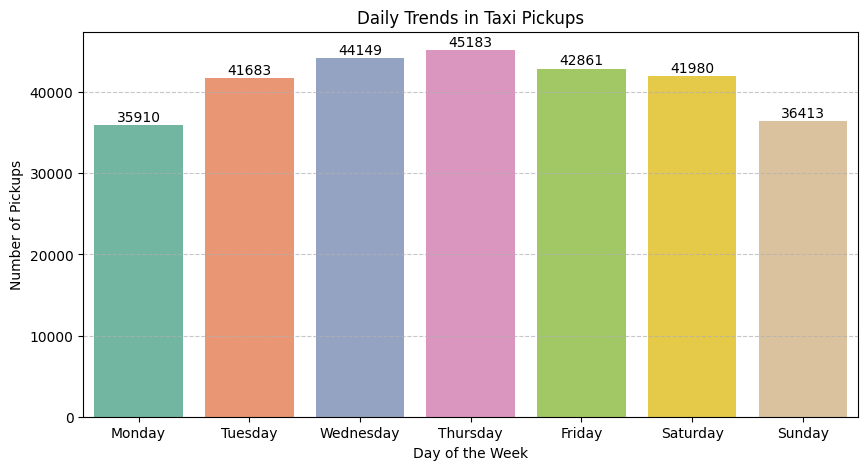

In [102]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_counts = df.assign(pickup_day=pd.to_datetime(df['tpep_pickup_datetime']).dt.dayofweek).groupby('pickup_day').size()
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=days, y=daily_counts.values, palette="Set2", ax=ax).set(xlabel='Day of the Week', ylabel='Number of Pickups', title='Daily Trends in Taxi Pickups')
[ax.text(i, v + 500, str(v), ha='center', fontsize=10) for i, v in enumerate(daily_counts)]
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

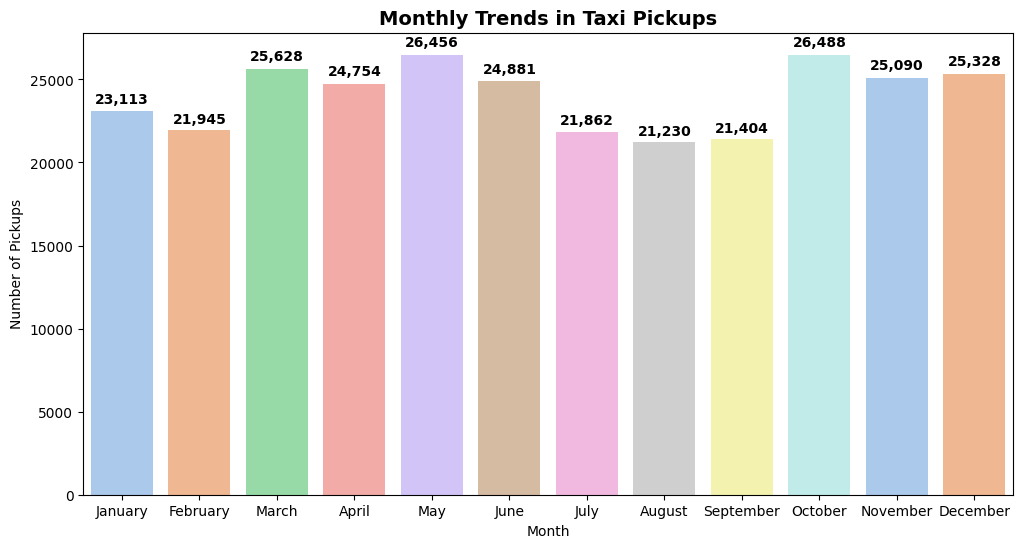

In [104]:
# Create and display monthly trend plot
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_data = df.assign(pickup_month=pd.to_datetime(df['tpep_pickup_datetime']).dt.month)['pickup_month'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=monthly_data.index, y=monthly_data.values, palette="pastel", ax=ax)
[ax.text(i, v * 1.02, f"{v:,}", ha='center', fontsize=10, fontweight='bold') for i, v in enumerate(monthly_data)]
ax.set(xlabel="Month", ylabel="Number of Pickups", title="Monthly Trends in Taxi Pickups", xticks=range(12), xticklabels=months)
ax.tick_params(axis='x', labelsize=10)
ax.title.set_fontsize(14)
ax.title.set_fontweight('bold')
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [105]:
# Analyse the above parameters
# List of financial columns to check
financial_columns = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

# Count zero values
zero_counts = (df[financial_columns] == 0).sum()

# Count negative values
negative_counts = (df[financial_columns] < 0).sum()

# Display results
print("Zero Values in Financial Columns:")
print(zero_counts)
print("\nNegative Values in Financial Columns:")
print(negative_counts)


Zero Values in Financial Columns:
fare_amount          0
tip_amount       66183
total_amount        10
trip_distance     5650
dtype: int64

Negative Values in Financial Columns:
fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

yes definetly

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [106]:
# Create a df with non zero entries for the selected parameters.
# Define columns to filter
filter_columns = ["fare_amount", "total_amount", "trip_distance"]

# Count zero values before filtering
zero_counts_before = (df[filter_columns] == 0).sum()
print("Zero Values Before Filtering:")
print(zero_counts_before)

# Remove rows where fare_amount or total_amount is zero
filtered_taxi_data = df[
    (df["fare_amount"] > 0) &
    (df["total_amount"] > 0)
]

# Handling trip_distance:
#Keep zero distances if fare > 0 (Uncomment to use this instead)
filtered_taxi_data = filtered_taxi_data[(filtered_taxi_data["trip_distance"] > 0) | (filtered_taxi_data["fare_amount"] > 0)]

# Count zero values after filtering
zero_counts_after = (filtered_taxi_data[filter_columns] == 0).sum()
print("\nZero Values After Filtering:")
print(zero_counts_after)


Zero Values Before Filtering:
fare_amount         0
total_amount       10
trip_distance    5650
dtype: int64

Zero Values After Filtering:
fare_amount         0
total_amount        0
trip_distance    5650
dtype: int64


In [107]:
filtered_taxi_data[(filtered_taxi_data[filter_columns] == 0).any(axis=1)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
47             1  2023-09-01 05:41:17   2023-09-01 05:51:07              1.0   
137            1  2023-09-01 10:09:37   2023-09-01 10:29:11              1.0   
149            1  2023-09-01 10:41:44   2023-09-01 10:42:55              1.0   
181            2  2023-09-01 11:48:30   2023-09-01 11:48:46              1.0   
281            2  2023-09-01 14:57:39   2023-09-01 15:13:55              1.0   
...          ...                  ...                   ...              ...   
287973         2  2023-11-30 19:52:56   2023-11-30 19:53:09              1.0   
288022         1  2023-11-30 20:34:23   2023-11-30 20:37:08              1.0   
288135         1  2023-11-30 22:56:45   2023-11-30 23:02:00              1.0   
288147         1  2023-11-30 22:55:44   2023-11-30 23:18:14              1.0   
288219         1  2023-11-30 23:57:07   2023-12-01 00:08:00              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
47                0.0         1.0                  N           143   
137               0.0         1.0                  N            48   
149               0.0         1.0                  N           145   
181               0.0         5.0                  N             1   
281               0.0         1.0                  N           116   
...               ...         ...                ...           ...   
287973            0.0         1.0                  N           132   
288022            0.0         1.0                  N           216   
288135            0.0         1.0                  N           161   
288147            0.0         1.0                  N           164   
288219            0.0         1.0                  N           161   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
47                75             1        14.53    0.0      0.5        0.00   
137              236             1        25.00    0.0      0.5        4.35   
149              145             2         3.70    0.0      0.5        0.00   
181                1             1        98.00    0.0      0.0       23.80   
281              238             1        14.20    0.0      0.5        3.64   
...              ...           ...          ...    ...      ...         ...   
287973           132             2         3.00    2.5      0.5        0.00   
288022           197             1         6.83    0.0      0.5        0.00   
288135           164             1        15.38    0.0      0.5        0.00   
288147           151             1        29.69    0.0      0.5        0.00   
288219           143             1        11.79    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
47               0.0                    1.0         18.53   
137              0.0                    1.0         35.35   
149              0.0                    1.0          5.20   
181             20.0                    1.0        142.80   
281              0.0                    1.0         21.84   
...              ...                    ...           ...   
287973           0.0                    1.0          8.75   
288022           0.0                    1.0          8.33   
288135           0.0                    1.0         19.38   
288147           0.0                    1.0         33.69   
288219           0.0                    1.0         15.79   

        congestion_surcharge  Airport_fee  
47                       2.5         0.00  
137                      2.5         0.00  
149                      0.0         0.00  
181                      0.0         0.00  
281                      2.5         0.00  
...                      ...          ...  
287973                   0.0         1.75  
288022                   2.5         0.00  
288135                   2.5         0.00  
288147                   2.5         0.00  
288219                   2.5         0.0

In [109]:
filtered_taxi_data = filtered_taxi_data[~((filtered_taxi_data["trip_distance"] == 0) & (filtered_taxi_data["PULocationID"] != filtered_taxi_data["DOLocationID"]))]

In [110]:
financial_columns = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

# Count zero values
(filtered_taxi_data[financial_columns] == 0).sum()

fare_amount          0
tip_amount       63442
total_amount         0
trip_distance     2353
dtype: int64

In [111]:
filtered_taxi_data.shape

(284869, 19)

In [112]:
filtered_taxi_data.describe()

VendorID  passenger_count  trip_distance     RatecodeID  \
count  284869.000000    284869.000000  284869.000000  284869.000000   
mean        1.739951         1.374049       3.477399       1.070885   
std         0.444070         0.866482       4.528593       0.380999   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.080000       1.000000   
50%         2.000000         1.000000       1.800000       1.000000   
75%         2.000000         1.000000       3.430000       1.000000   
max         6.000000         6.000000     187.350000       5.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  284869.000000  284869.000000  284869.000000  284869.000000   
mean      165.342596     163.988012       1.199067      19.780816   
std        63.977162      69.734662       0.459661      18.029751   
min         1.000000       1.000000       1.000000       0.010000   
25%       132.000000     113.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      21.900000   
max       265.000000     265.000000       4.000000     455.200000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  284869.000000  284869.000000  284869.000000  284869.000000   
mean        1.601149       0.495631       3.575675       0.592196   
std         1.826277       0.046612       4.050647       2.159359   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.860000       0.000000   
75%         2.500000       0.500000       4.470000       0.000000   
max        14.250000       0.800000     150.290000      53.000000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          284869.000000  284869.000000         284869.000000   
mean                0.999454      28.878622              2.317890   
std                 0.020045      22.646540              0.649702   
min                 0.000000       1.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      30.800000              2.500000   
max                 1.000000     488.700000              2.500000   

         Airport_fee  
count  284869.000000  
mean        0.139085  
std         0.458901  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.750000

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

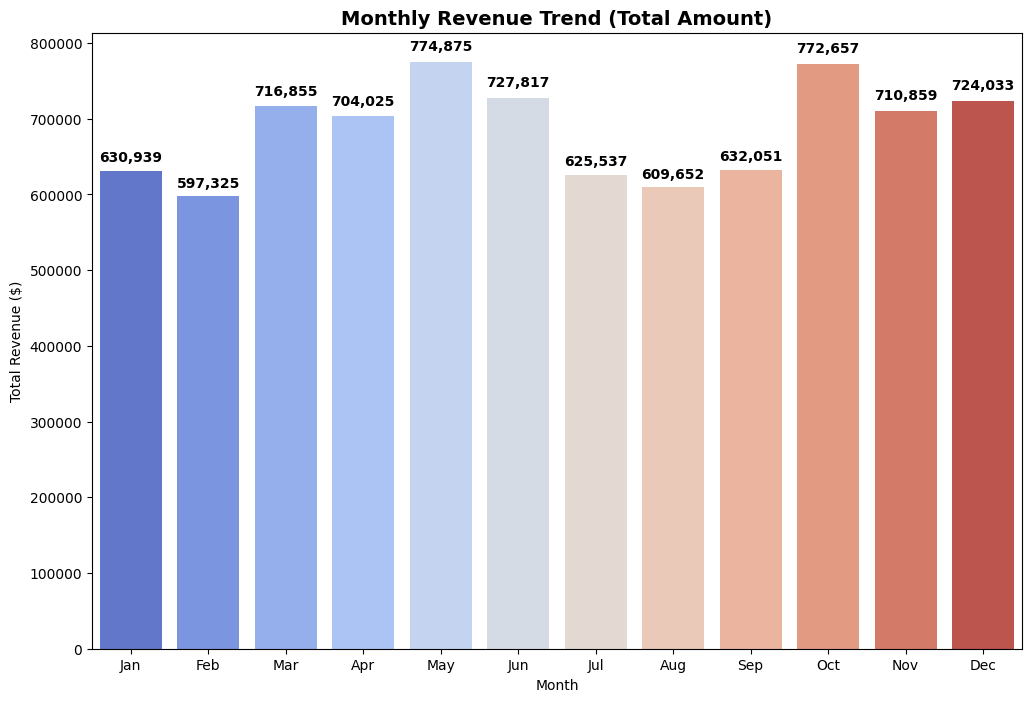

pickup_month
1     630939.30
2     597324.52
3     716855.15
4     704024.67
5     774875.07
6     727816.86
7     625537.03
8     609651.93
9     632051.47
10    772656.81
11    710858.76
12    724032.64
Name: total_amount, dtype: float64


In [115]:
# Group data by month and analyse monthly revenue
filtered_taxi_data['pickup_month'] = pd.to_datetime(filtered_taxi_data['tpep_pickup_datetime']).dt.month

# Create and display monthly revenue plot
months_short = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
monthly_rev = filtered_taxi_data.groupby('pickup_month')['total_amount'].sum().sort_index()
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=monthly_rev.index, y=monthly_rev.values, palette="coolwarm", order=range(1, 13), ax=ax)
[ax.text(i, v * 1.02, f"{v:,.0f}", ha='center', fontsize=10, fontweight='bold') for i, v in enumerate(monthly_rev)]
ax.set(xlabel="Month", ylabel="Total Revenue ($)", title="Monthly Revenue Trend (Total Amount)", xticks=range(12), xticklabels=months_short)
ax.tick_params(labelsize=10)
ax.title.set(fontsize=14, fontweight='bold')
plt.show()
print(monthly_rev)

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

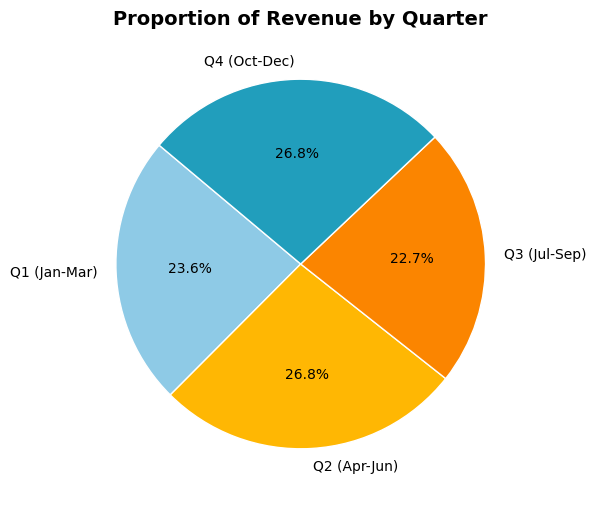

In [119]:
# Calculate proportion of each quarter

filtered_taxi_data['quarter'] = pd.to_datetime(filtered_taxi_data['tpep_pickup_datetime']).dt.quarter
quarterly_revenue = filtered_taxi_data.groupby('quarter')['total_amount'].sum()

# Define Labels and Colors
labels = ["Q1 (Jan-Mar)", "Q2 (Apr-Jun)", "Q3 (Jul-Sep)", "Q4 (Oct-Dec)"]

# Plot the Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(quarterly_revenue, labels=labels, autopct='%1.1f%%', colors=['#8ecae6', '#ffb703', '#fb8500', '#219ebc'], startangle=140, wedgeprops={'edgecolor': 'white'})

# Title and Show
plt.title("Proportion of Revenue by Quarter", fontsize=14, fontweight='bold')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Correlation between trip_distance and fare_amount: 0.9425


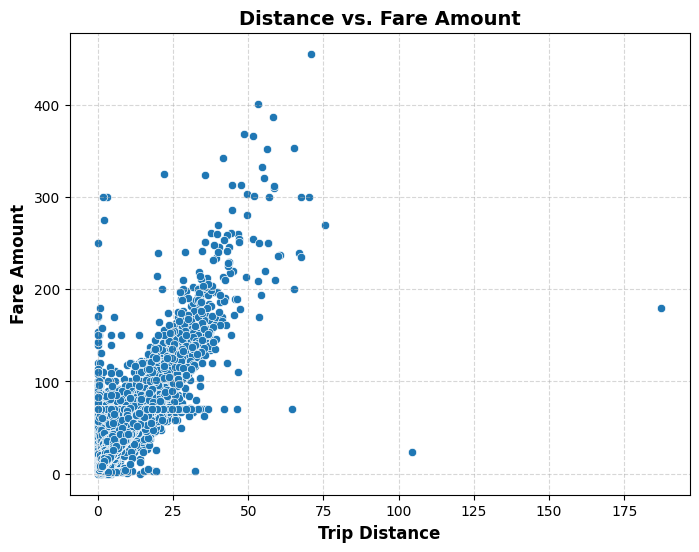

In [120]:
# Show how trip fare is affected by distance
# Step 1: Filter out invalid distances
filtered_df = filtered_taxi_data[filtered_taxi_data['trip_distance'] > 0]

# Step 2: Compute correlation
correlation = filtered_df["trip_distance"].corr(filtered_df["fare_amount"])
print(f"Correlation between trip_distance and fare_amount: {correlation:.4f}")

# Step 3: Create the figure
plt.figure(figsize=(8, 6))

# Step 4: Scatter plot with transparency for clarity
sns.scatterplot(
    x="trip_distance",
    y="fare_amount",
    data=filtered_df,
)
# Step 6: Customize labels and titles
plt.xlabel("Trip Distance", fontsize=12, fontweight='bold')
plt.ylabel("Fare Amount", fontsize=12, fontweight='bold')
plt.title("Distance vs. Fare Amount", fontsize=14, fontweight='bold')

# Step 7: Grid and Adjust Layout
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [121]:
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors


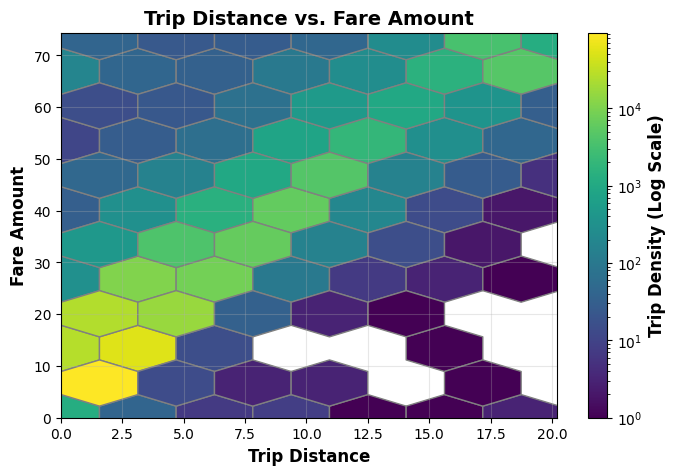

In [123]:
# Step 1: Create hexbin plot
plt.figure(figsize=(8, 5))

hb = plt.hexbin(
    filtered_df["trip_distance"],
    filtered_df["fare_amount"],
    gridsize=60,  # Increase for better detail
    cmap="viridis",  # More readable colors
    mincnt=1,  # Avoid empty bins
    edgecolors="gray",  # Improve hexagon visibility
  norm=mcolors.LogNorm()  # Log scale for density visibility
)

# Step 2: Add color bar
cb = plt.colorbar(hb, label="Density of Trips")
cb.set_label("Trip Density (Log Scale)", fontsize=12, fontweight="bold")

# Step 3: Customize axes and title
plt.xlabel("Trip Distance", fontsize=12, fontweight="bold")
plt.ylabel("Fare Amount", fontsize=12, fontweight="bold")
plt.title("Trip Distance vs. Fare Amount", fontsize=14, fontweight="bold")

# Step 4: Limit outliers
plt.xlim(0, filtered_df["trip_distance"].quantile(0.99))
plt.ylim(0, filtered_df["fare_amount"].quantile(0.99))

# Step 5: Add light grid
plt.grid(alpha=0.3)

# Step 6: Show the plot
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between trip_duration and fare_amount: 0.27


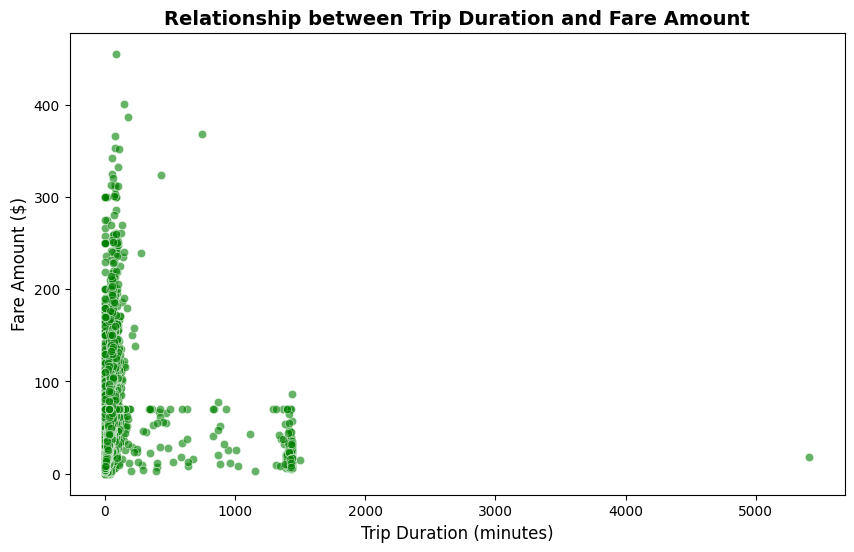

In [124]:
# Show relationship between fare and trip duration

filtered_taxi_data['tpep_pickup_datetime'] = pd.to_datetime(filtered_taxi_data['tpep_pickup_datetime'])
filtered_taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(filtered_taxi_data['tpep_dropoff_datetime'])
filtered_taxi_data['trip_duration'] = (filtered_taxi_data['tpep_dropoff_datetime'] - filtered_taxi_data['tpep_pickup_datetime']).dt.total_seconds() /60 # Convert to minutes

# Filter out rows with zero or negative duration (if any)
filtered_df = filtered_taxi_data[filtered_taxi_data['trip_duration'] > 0]

# Calculate the correlation coefficient between trip_duration and fare_amount
correlation = filtered_df['trip_duration'].corr(filtered_df['fare_amount'])
print(f"Correlation between trip_duration and fare_amount: {correlation:.2f}")

# Plot the scatter plot between fare amount and trip duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_df['trip_duration'], y=filtered_df['fare_amount'], color='green', alpha=0.6)

# Add labels and title
plt.xlabel("Trip Duration (minutes)", fontsize=12)
plt.ylabel("Fare Amount ($)", fontsize=12)
plt.title("Relationship between Trip Duration and Fare Amount", fontsize=14, fontweight='bold')
# Show the plot
plt.show()

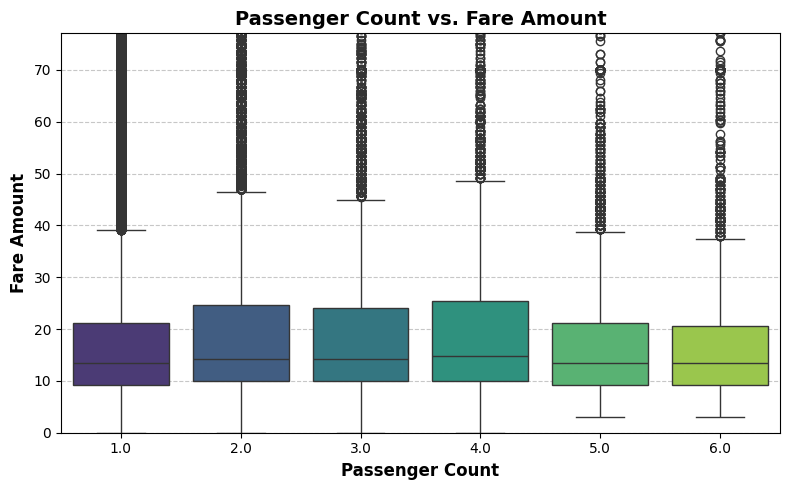

In [125]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(8, 5))

ax = sns.boxplot(
    data=filtered_taxi_data,
    x='passenger_count',
    y='fare_amount',
    palette="viridis",
    showfliers=True
)
plt.ylim(0, filtered_taxi_data["fare_amount"].quantile(0.99))

# Add title and labels
plt.title("Passenger Count vs. Fare Amount", fontsize=14, fontweight='bold')
plt.xlabel("Passenger Count", fontsize=12, fontweight='bold')
plt.ylabel("Fare Amount", fontsize=12, fontweight='bold')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


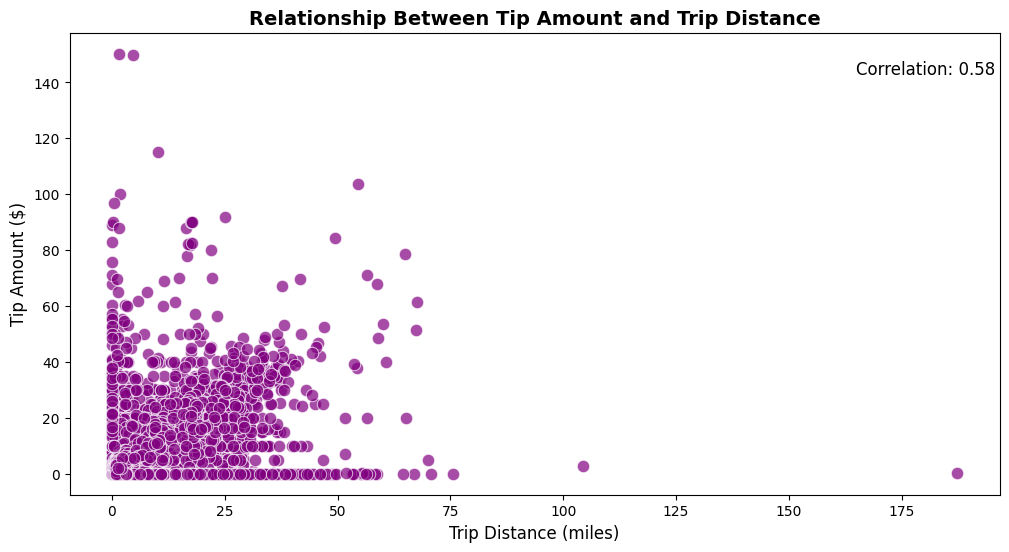

In [126]:
# Show relationship between tip and trip distance

plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=filtered_taxi_data, color='purple', s=80, alpha=0.7)

# Add labels and title
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Tip Amount ($)', fontsize=12)
plt.title('Relationship Between Tip Amount and Trip Distance', fontsize=14, fontweight='bold')

# Display correlation value
correlation = filtered_taxi_data['trip_distance'].corr(filtered_taxi_data['tip_amount'])
plt.figtext(0.78, 0.81, f'Correlation: {correlation:.2f}', fontsize=12, color='black')

plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [127]:
# Analyse the distribution of different payment types (payment_type).
payment_type_mapping = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided Trip"
}
filtered_taxi_data['payment_type'] = filtered_taxi_data['payment_type'].map(payment_type_mapping)
payment_counts = filtered_taxi_data['payment_type'].value_counts()
payment_percentage = filtered_taxi_data['payment_type'].value_counts(normalize=True) * 100
payment_counts



payment_type
Credit Card    233512
Cash            48040
Dispute          2034
No Charge        1283
Name: count, dtype: int64

In [128]:
payment_percentage

payment_type
Credit Card    81.971713
Cash           16.863892
Dispute         0.714012
No Charge       0.450382
Name: proportion, dtype: float64

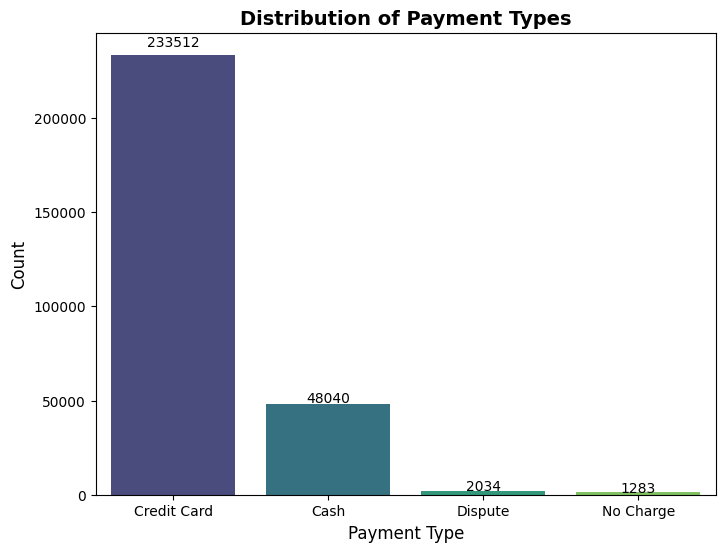

In [130]:
# Count the occurrences of each payment type
payment_type_counts = filtered_taxi_data['payment_type'].value_counts()

# Plot the distribution of payment types
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Payment Types', fontsize=14, fontweight='bold')

# Show values on top of bars
for i, val in enumerate(payment_type_counts.values):
    plt.text(i, val * 1.02, str(val), ha='center', fontsize=10)

plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [131]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [132]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/Assignment/taxi_zones/taxi_zones.shp") # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


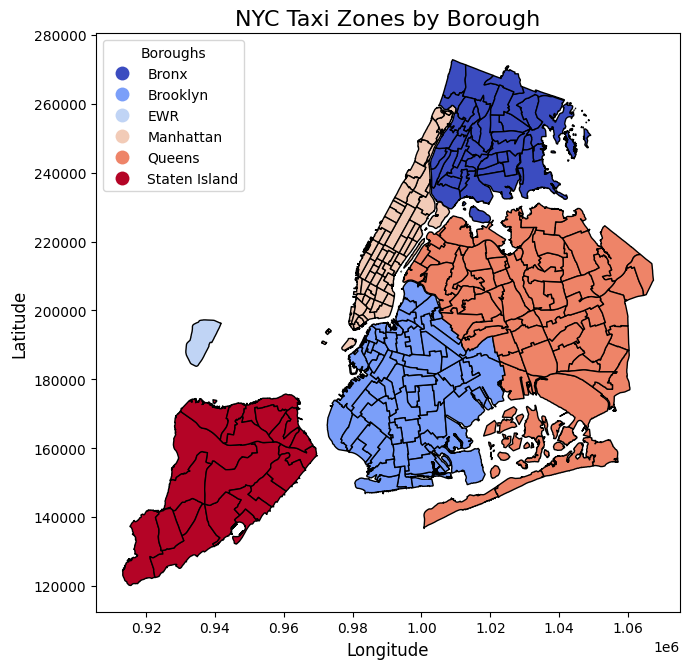

In [134]:
# print(zones.info())
# zones.plot()

print(zones.info())
fig, ax = plt.subplots(figsize=(7, 7))

zones.plot(
    column="borough",
    cmap="coolwarm",
    edgecolor="black",
    legend=True,
    ax=ax,
    legend_kwds={
        'loc': 'upper left',
        'bbox_to_anchor': (0, 1),
        'title': 'Boroughs'
    }
)

ax.set_title("NYC Taxi Zones by Borough", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

plt.tight_layout()
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [135]:
# Merge zones and trip records using locationID and PULocationID
taxi_data_zones_merged = filtered_taxi_data.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")

# Check the merged DataFrame
taxi_data_zones_merged.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-09-01 00:39:59   2023-09-01 01:00:28              1.0   
1         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
2         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
3         2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
4         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           4.71         1.0                  N           113           238   
1           0.56         1.0                  N           142           142   
2          18.46         2.0                  N           132           163   
3          13.71         1.0                  N           249           180   
4           0.71         1.0                  N           144           232   

  payment_type  ...  pickup_month  quarter  trip_duration  OBJECTID  \
0  Credit Card  ...             9        3      20.483333     113.0   
1         Cash  ...             9        3       2.483333     142.0   
2  Credit Card  ...             9        3      44.583333     132.0   
3      Dispute  ...             9        3      38.116667     249.0   
4  Credit Card  ...             9        3       6.300000     144.0   

   Shape_Leng  Shape_Area                     zone  LocationID    borough  \
0    0.032745    0.000058  Greenwich Village North       113.0  Manhattan   
1    0.038176    0.000076      Lincoln Square East       142.0  Manhattan   
2    0.245479    0.002038              JFK Airport       132.0     Queens   
3    0.036384    0.000072             West Village       249.0  Manhattan   
4    0.027620    0.000047      Little Italy/NoLiTa       144.0  Manhattan   

                                            geometry  
0  POLYGON ((986643.64 204346.324, 986592.535 204...  
1  POLYGON ((989380.305 218980.247, 989359.803 21...  
2  MULTIPOLYGON (((1032791.001 181085.006, 103283...  
3  POLYGON ((983555.319 204876.901, 983469.158 20...  
4  POLYGON ((985411.76 200369.518, 985342.573 200...  

[5 rows x 29 columns]

In [136]:
taxi_data_zones_merged.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
store_and_fwd_flag          0
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
Airport_fee                 0
pickup_month                0
quarter                     0
trip_duration               0
OBJECTID                 2875
Shape_Leng               2875
Shape_Area               2875
zone                     2875
LocationID               2875
borough                  2875
geometry                 2875
dtype: int64

In [137]:
taxi_data_zones_merged = taxi_data_zones_merged.dropna(subset=["zone"])

In [138]:
taxi_data_zones_merged.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
pickup_month             0
quarter                  0
trip_duration            0
OBJECTID                 0
Shape_Leng               0
Shape_Area               0
zone                     0
LocationID               0
borough                  0
geometry                 0
dtype: int64

In [139]:
taxi_data_zones_merged.shape

(282014, 29)

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [140]:
# Group data by location and calculate the number of trips
trips_per_location = taxi_data_zones_merged.groupby("PULocationID").size().reset_index(name="num_trips")

# Merge with taxi_data_zones_merged to get zone names
trips_per_location = trips_per_location.merge(
    taxi_data_zones_merged[["PULocationID", "zone"]].drop_duplicates(),
    on="PULocationID",
    how="left"
)

# Sort by most popular locations
trips_per_location = trips_per_location.sort_values(by="num_trips", ascending=False)

# Display the top 10 locations with zone names
trips_per_location[['PULocationID','zone','num_trips']].head(10)


PULocationID                          zone  num_trips
116           132                   JFK Airport      14697
214           237         Upper East Side South      13336
144           161                Midtown Center      13192
213           236         Upper East Side North      12016
145           162                  Midtown East      10214
122           138             LaGuardia Airport       9723
165           186  Penn Station/Madison Sq West       9588
207           230     Times Sq/Theatre District       9436
126           142           Lincoln Square East       9304
153           170                   Murray Hill       8367

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [141]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(trips_per_location, left_on="LocationID", right_on="PULocationID", how="left")

# Fill NaN values (for locations with no trips) with 0
zones["num_trips"] = zones["num_trips"].fillna(0)
zones.head()



OBJECTID  Shape_Leng  Shape_Area                   zone_x  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  num_trips                   zone_y  
0           1.0       39.0           Newark Airport  
1           NaN        0.0                      NaN  
2           3.0        9.0  Allerton/Pelham Gardens  
3           4.0      321.0            Alphabet City  
4           5.0        1.0            Arden Heights

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

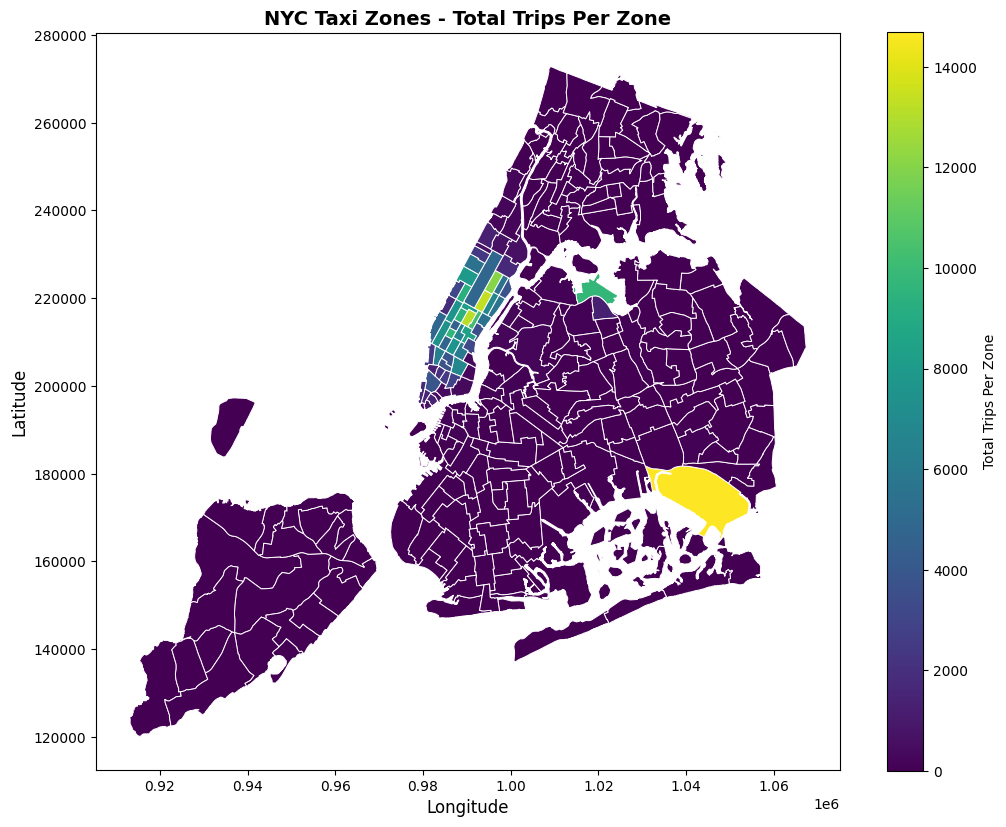

In [148]:
# Define figure and axis


# Plot the map and display it
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as mcolors
import matplotlib.patheffects as pe

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 20))

# Plot NYC taxi zones colored by the number of trips
zones.sort_values(by="num_trips", ascending=False).plot(column="num_trips", cmap="viridis", edgecolor="white", linewidth=0.7,
           legend=True, ax=ax,
       legend_kwds={'label': "Total Trips Per Zone", 'orientation': "vertical",'shrink': 0.48})

# Title and labels
plt.title("NYC Taxi Zones - Total Trips Per Zone", fontsize=14, fontweight='bold')
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Show plot
plt.show()

In [149]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones.sort_values(by="num_trips", ascending=False)
zones_sorted[["LocationID", "borough", "zone_x", "num_trips"]].head(10)


LocationID    borough                        zone_x  num_trips
131         132     Queens                   JFK Airport    14697.0
236         237  Manhattan         Upper East Side South    13336.0
160         161  Manhattan                Midtown Center    13192.0
235         236  Manhattan         Upper East Side North    12016.0
161         162  Manhattan                  Midtown East    10214.0
137         138     Queens             LaGuardia Airport     9723.0
185         186  Manhattan  Penn Station/Madison Sq West     9588.0
229         230  Manhattan     Times Sq/Theatre District     9436.0
141         142  Manhattan           Lincoln Square East     9304.0
169         170  Manhattan                   Murray Hill     8367.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [150]:
# Find routes which have the slowest speeds at different times of the day

# Assume df_filtered contains pickup and dropoff details with timestamps
# Filter out rows where trip duration or speed is negative
taxi_data_zones_merged['trip_duration_hours'] = (taxi_data_zones_merged['tpep_dropoff_datetime'] -
                                             taxi_data_zones_merged['tpep_pickup_datetime']).dt.total_seconds() / 3600
df_filtered_clean = taxi_data_zones_merged[(taxi_data_zones_merged["trip_duration_hours"] > 0) & (taxi_data_zones_merged["trip_distance"] > 0)]

# Add the 'pickup_hour' column to df_filtered_clean
df_filtered_clean['pickup_hour'] = pd.to_datetime(df_filtered_clean['tpep_pickup_datetime']).dt.hour

# Group by route and hour again with cleaned data
route_speed_clean = df_filtered_clean.groupby(["PULocationID", "DOLocationID", "pickup_hour"]).agg(
    avg_duration=("trip_duration_hours", "mean"),  # Average trip duration per route-hour
    total_distance=("trip_distance", "mean")  # Total distance per route-hour
).reset_index()

# Compute speed (distance / avg duration)
route_speed_clean["avg_speed"] = route_speed_clean["total_distance"] / (route_speed_clean["avg_duration"] + 1e-5)  # Avoid division by zero

# Find the slowest routes (smallest speed)
slowest_routes_clean = route_speed_clean.sort_values(by="avg_speed", ascending=True).head(10)  # Adjust for top N slowest routes

# Display the cleaned slowest routes
slowest_routes_clean

PULocationID  DOLocationID  pickup_hour  avg_duration  total_distance  \
47047           226           145           18     45.165000            1.20   
17327           113           113           13      5.979236            0.23   
61092           260           129           17     23.560556            0.96   
45412           209           232           13     23.864722            1.04   
17894           113           235           22      5.820556            0.28   
5617             50            43            8     23.855556            1.42   
40118           164           100           21     11.647222            0.79   
23661           134           265           15      1.354444            0.10   
12701            88           144            0     23.757778            1.78   
43192           181           132           20     24.996944            2.29   

       avg_speed  
47047   0.026569  
17327   0.038466  
61092   0.040746  
45412   0.043579  
17894   0.048105  
5617    0.059525  
40118   0.067827  
23661   0.073830  
12701   0.074923  
43192   0.091611

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

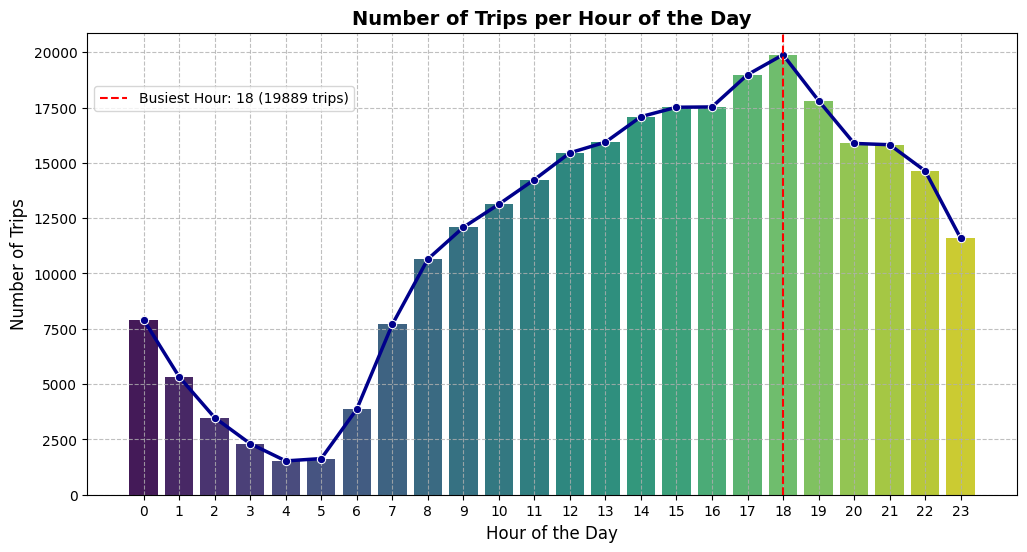

(np.int32(18), 19889)

In [151]:
# Calculate the number of trips per hour

# Add the 'pickup_hour' column to taxi_data_zones_merged
taxi_data_zones_merged['pickup_hour'] = pd.to_datetime(taxi_data_zones_merged['tpep_pickup_datetime']).dt.hour

trips_per_hour = taxi_data_zones_merged.groupby('pickup_hour').size()

# Find the busiest hour
busiest_hour = trips_per_hour.idxmax()  # Hour with max trips
busiest_hour_trips = trips_per_hour.max()  # Number of trips in that hour

# Create the figure
plt.figure(figsize=(12, 6))

# Bar plot for the number of trips per hour
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette='viridis')

# Line plot to show the trend
sns.lineplot(x=trips_per_hour.index, y=trips_per_hour.values, color="darkblue", marker="o",markersize=6, linewidth=2.5)

# Highlight the busiest hour with a vertical line
plt.axvline(x=busiest_hour, color='red', linestyle='--', label=f'Busiest Hour: {busiest_hour} ({busiest_hour_trips} trips)')

# Add labels and title
plt.title('Number of Trips per Hour of the Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.grid(True, linestyle="--", alpha=0.8)
# Show the legend
plt.legend(loc="upper left", bbox_to_anchor=(0, 0.9), fontsize=10)

# Show the plot
plt.show()

# Return the busiest hour and its trip count
busiest_hour, busiest_hour_trips

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [152]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers


# Calculate the number of trips per hour
trip_count_per_hour = taxi_data_zones_merged.groupby('pickup_hour').size().reset_index(name='trip_count')

# Scale up the number of trips using the sampling fraction
sample_fraction = 0.008  # Replace this with your actual sampling fraction
trip_count_per_hour['actual_trip_count'] = (trip_count_per_hour['trip_count'] / sample_fraction).astype(int)

# Find the five busiest hours
top_5_hours = trip_count_per_hour.nlargest(5, 'trip_count')

# Display results
top_5_hours



pickup_hour  trip_count  actual_trip_count
18           18       19889            2486125
17           17       18987            2373375
19           19       17813            2226625
16           16       17529            2191125
15           15       17515            2189375

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [153]:
taxi_data_zones_merged.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'pickup_month',
 'quarter',
 'trip_duration',
 'OBJECTID',
 'Shape_Leng',
 'Shape_Area',
 'zone',
 'LocationID',
 'borough',
 'geometry',
 'trip_duration_hours',
 'pickup_hour']

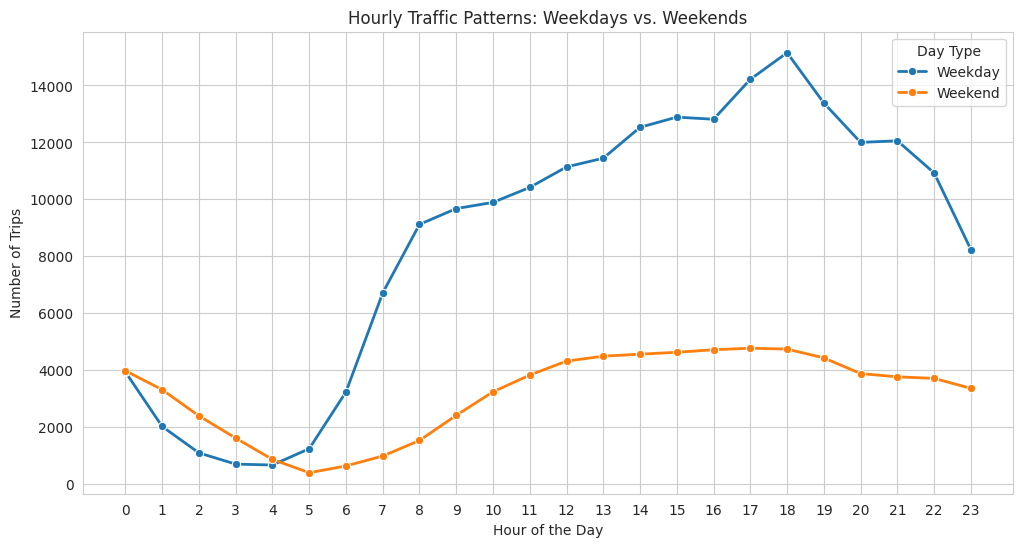

In [154]:
# Compare traffic trends for the week days and weekends
import matplotlib.pyplot as plt
import seaborn as sns

# Extract pickup hour and day of the week
taxi_data_zones_merged['pickup_hour'] = pd.to_datetime(taxi_data_zones_merged['tpep_pickup_datetime']).dt.hour
taxi_data_zones_merged['pickup_day'] = pd.to_datetime(taxi_data_zones_merged['tpep_pickup_datetime']).dt.dayofweek # Monday=0, Sunday=6

# Separate weekdays and weekends (Weekdays: 0-4, Weekends: 5-6)
weekdays = taxi_data_zones_merged[taxi_data_zones_merged['pickup_day'] <= 4]
weekends = taxi_data_zones_merged[taxi_data_zones_merged['pickup_day'] >= 5]

# Count the number of trips per hour for weekdays and weekends
weekday_counts = weekdays.groupby('pickup_hour').size()
weekend_counts = weekends.groupby('pickup_hour').size()

# Plot the data in one figure
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
# Weekday plot
sns.lineplot(x=weekday_counts.index, y=weekday_counts.values, marker='o', label="Weekday", linewidth=2)

# Weekend plot
sns.lineplot(x=weekend_counts.index, y=weekend_counts.values, marker='o', label="Weekend", linewidth=2)

# Titles and labels
plt.title("Hourly Traffic Patterns: Weekdays vs. Weekends")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.xticks(range(24))

# Legend
plt.legend(title="Day Type")

# Show the plot
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

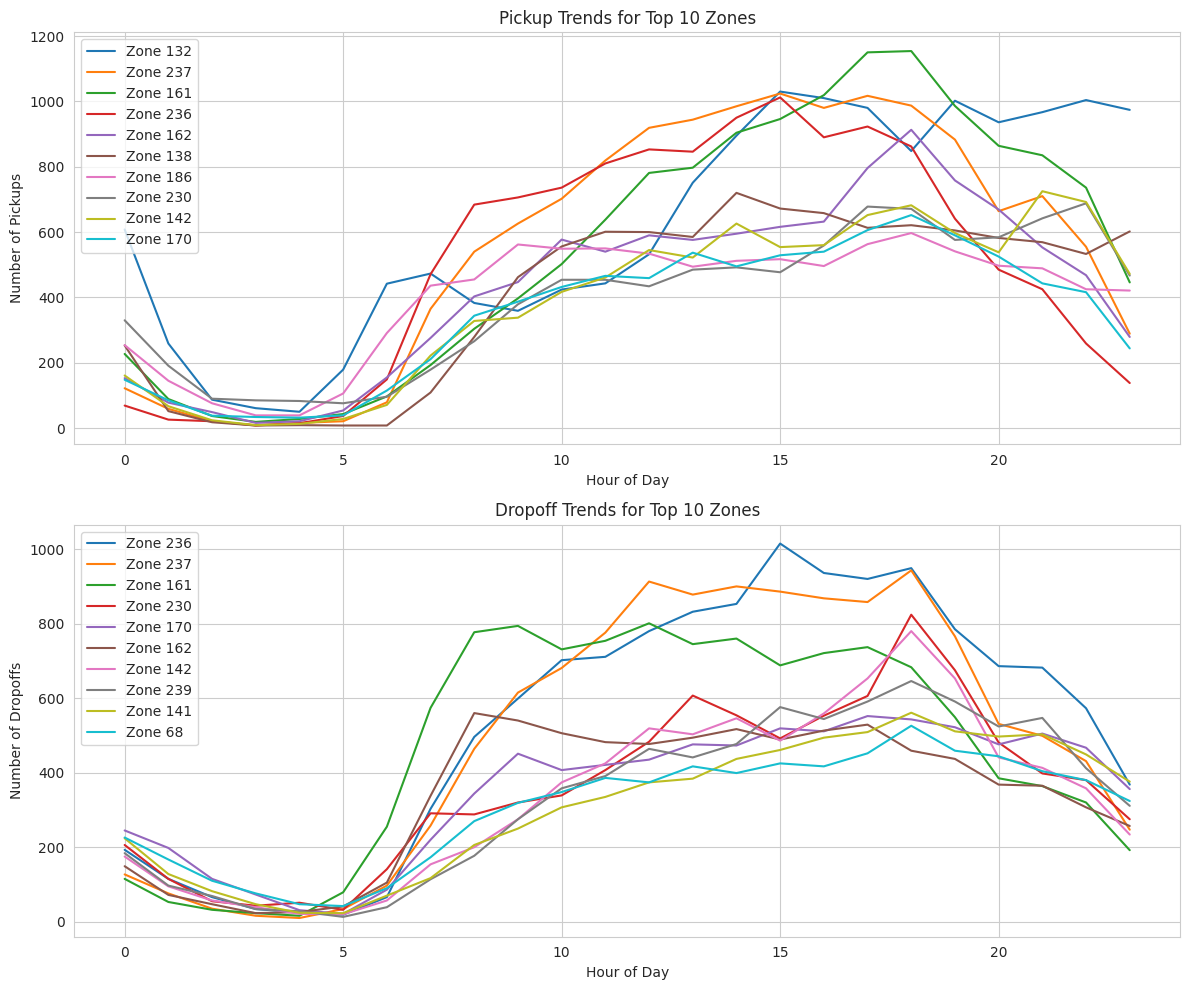

In [155]:
# Group by Pickup Hour and PULocationID
pickup_counts = taxi_data_zones_merged.groupby(['pickup_hour', 'PULocationID']).size().reset_index(name='pickup_count')
taxi_data_zones_merged['dropoff_hour'] = pd.to_datetime(taxi_data_zones_merged['tpep_dropoff_datetime']).dt.hour
# Group by Dropoff Hour and DOLocationID
dropoff_counts = taxi_data_zones_merged.groupby(['dropoff_hour', 'DOLocationID']).size().reset_index(name='dropoff_count')

# Find top 10 pickup zones by total pickups
top_pickup_zones = pickup_counts.groupby('PULocationID')['pickup_count'].sum().nlargest(10).index

# Find top 10 dropoff zones by total dropoffs
top_dropoff_zones = dropoff_counts.groupby('DOLocationID')['dropoff_count'].sum().nlargest(10).index

# Filter data for these top zones
pickup_top_zones = pickup_counts[pickup_counts['PULocationID'].isin(top_pickup_zones)]
dropoff_top_zones = dropoff_counts[dropoff_counts['DOLocationID'].isin(top_dropoff_zones)]

# Plot the pickup and dropoff trends for top 10 zones
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Pickup Trends for Top 10 Zones
for zone in top_pickup_zones:
    zone_data = pickup_top_zones[pickup_top_zones['PULocationID'] == zone]
    ax[0].plot(zone_data['pickup_hour'], zone_data['pickup_count'], label=f'Zone {zone}')

ax[0].set_title('Pickup Trends for Top 10 Zones')
ax[0].set_xlabel('Hour of Day')
ax[0].set_ylabel('Number of Pickups')
ax[0].legend(loc='upper left')

# Dropoff Trends for Top 10 Zones
for zone in top_dropoff_zones:
    zone_data = dropoff_top_zones[dropoff_top_zones['DOLocationID'] == zone]
    ax[1].plot(zone_data['dropoff_hour'], zone_data['dropoff_count'], label=f'Zone {zone}')

ax[1].set_title('Dropoff Trends for Top 10 Zones')
ax[1].set_xlabel('Hour of Day')
ax[1].set_ylabel('Number of Dropoffs')
ax[1].legend(loc='upper left')

plt.tight_layout()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [156]:
# Calculate total pickups per zone
pickup_total = pickup_counts.groupby('PULocationID')['pickup_count'].sum()

# Calculate total dropoffs per zone
dropoff_total = dropoff_counts.groupby('DOLocationID')['dropoff_count'].sum()

# Combine pickup and dropoff data for each zone into a single DataFrame
zone_data = pd.DataFrame({'total_pickups': pickup_total, 'total_dropoffs': dropoff_total})

# Fill missing values with 0 (zones with only pickups or only dropoffs)
zone_data.fillna(0, inplace=True)

# Avoid division by zero (replace 0 dropoffs with a small number)
zone_data['total_dropoffs'] = zone_data['total_dropoffs'].replace(0, 1)

# Calculate the pickup to dropoff ratio for each zone
zone_data['pickup_dropoff_ratio'] = zone_data['total_pickups'] / zone_data['total_dropoffs']

# Sort by pickup/dropoff ratio (high to low)
top_10_ratios = zone_data.sort_values('pickup_dropoff_ratio', ascending=False).head(10)

# Sort by pickup/dropoff ratio (low to high)
bottom_10_ratios = zone_data.sort_values('pickup_dropoff_ratio', ascending=True).head(10)

# Display the top 10 and bottom 10 pickup/dropoff ratios
print("Top 10 Zones with the Highest Pickup/Dropoff Ratios:")
top_10_ratios


Top 10 Zones with the Highest Pickup/Dropoff Ratios:


total_pickups  total_dropoffs  pickup_dropoff_ratio
70          1274.0             159              8.012579
132        14697.0            3373              4.357249
138         9723.0            3659              2.657283
186         9588.0            6353              1.509208
249         6344.0            4601              1.378831
43          4790.0            3496              1.370137
114         3714.0            2741              1.354980
162        10214.0            8101              1.260832
161        13192.0           11148              1.183351
100         4607.0            3895              1.182798

In [157]:
print("\nTop 10 Zones with the Lowest Pickup/Dropoff Ratios:")
bottom_10_ratios


Top 10 Zones with the Lowest Pickup/Dropoff Ratios:


total_pickups  total_dropoffs  pickup_dropoff_ratio
8              0.0               4                   0.0
30             0.0               3                   0.0
27             0.0               5                   0.0
58             0.0              10                   0.0
59             0.0               1                   0.0
57             0.0               1                   0.0
99             0.0               1                   0.0
111            0.0               3                   0.0
206            0.0               6                   0.0
251            0.0               3                   0.0

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [158]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter for night hours (11 PM to 5 AM)
night_hours = taxi_data_zones_merged[(taxi_data_zones_merged['pickup_hour'] >= 23) | (taxi_data_zones_merged['pickup_hour'] <= 5)]

# Group by PULocationID for pickups and DOLocationID for dropoffs
pickup_night_counts = night_hours.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_night_counts = night_hours.groupby('DOLocationID').size().reset_index(name='dropoff_count')

# Merge with taxi zone lookup to get zone names
pickup_night_counts = pickup_night_counts.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')
dropoff_night_counts = dropoff_night_counts.merge(zones, left_on='DOLocationID', right_on='LocationID', how='left')

# Sort to get the top 10 zones
top_pickup_zones_night = pickup_night_counts.sort_values(by='pickup_count', ascending=False).head(10)
top_dropoff_zones_night = dropoff_night_counts.sort_values(by='dropoff_count', ascending=False).head(10)

# Select only relevant columns for display
top_pickup_zones_night = top_pickup_zones_night.rename(columns={'zone_x': 'Zone', 'PULocationID_x': 'PULocationID'})
top_dropoff_zones_night = top_dropoff_zones_night.rename(columns={'zone_x': 'Zone', 'DOLocationID': 'DOLocationID'})
top_pickup_zones_night = top_pickup_zones_night[['Zone', 'borough', 'PULocationID', 'pickup_count']]
top_dropoff_zones_night = top_dropoff_zones_night[['Zone', 'borough', 'DOLocationID', 'dropoff_count']]
# Display results
print("Top 10 Night Pickup Zones:")
top_pickup_zones_night


Top 10 Night Pickup Zones:


Zone    borough  PULocationID  pickup_count
54                   East Village  Manhattan            79          2456
89                    JFK Airport     Queens           132          2218
176                  West Village  Manhattan           249          1994
31                   Clinton East  Manhattan            48          1601
103               Lower East Side  Manhattan           148          1529
77        Greenwich Village South  Manhattan           114          1332
160     Times Sq/Theatre District  Manhattan           230          1322
128  Penn Station/Madison Sq West  Manhattan           186          1080
115                 Midtown South  Manhattan           164           961
94              LaGuardia Airport     Queens           138           950

In [159]:
top_dropoff_zones_night

Zone    borough  DOLocationID  dropoff_count
74            East Village  Manhattan            79           1321
44            Clinton East  Manhattan            48           1090
156            Murray Hill  Manhattan           170            974
63            East Chelsea  Manhattan            68            927
97                Gramercy  Manhattan           107            909
129        Lenox Hill West  Manhattan           141            837
242         Yorkville West  Manhattan           263            822
228           West Village  Manhattan           249            730
216  Upper East Side North  Manhattan           236            722
84                Flatiron  Manhattan            90            704

<Figure size 960x720 with 0 Axes>

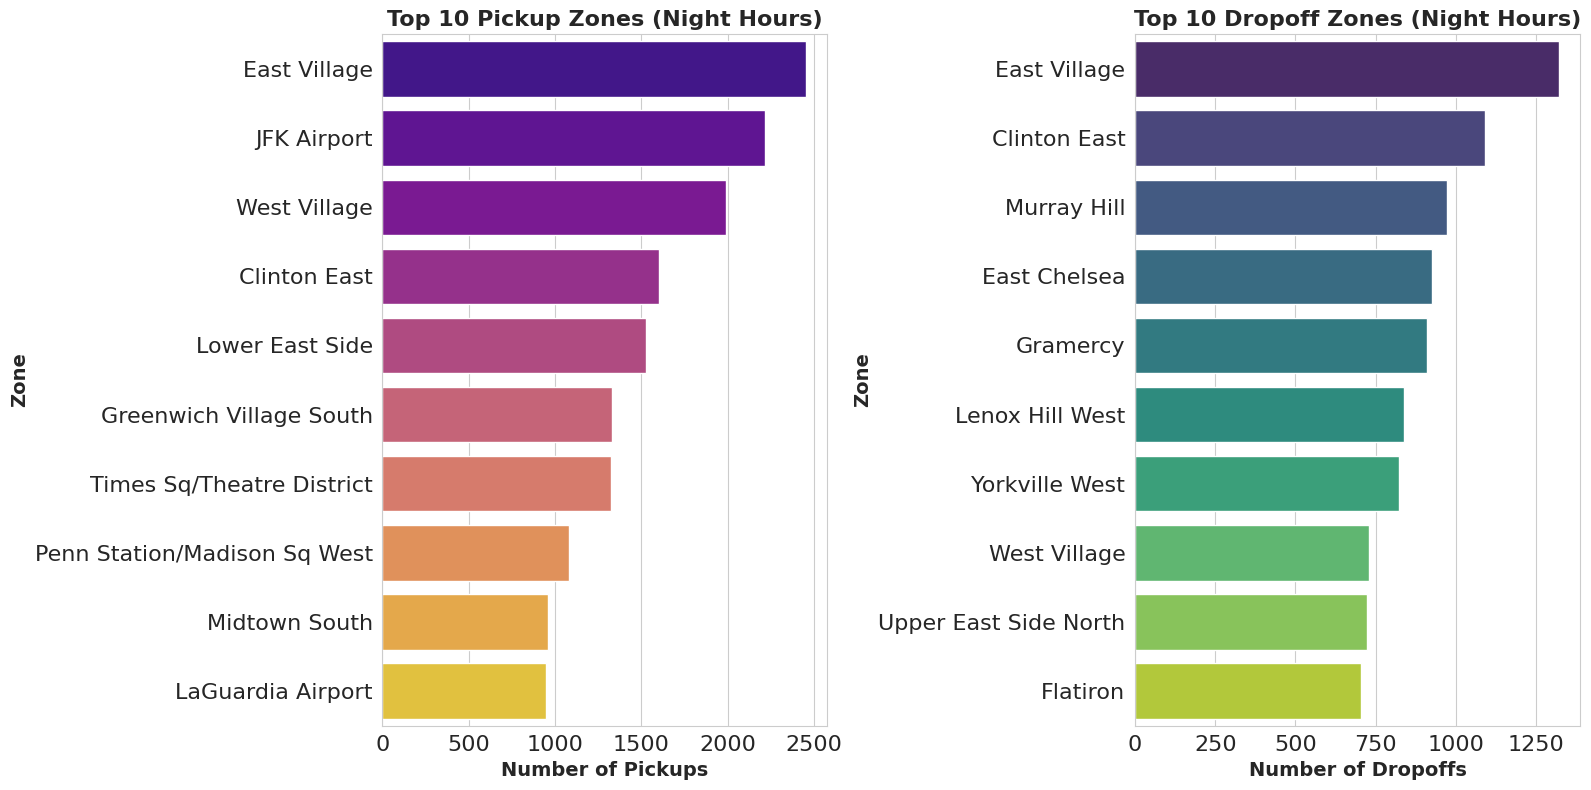

In [160]:
# Set plot style and increase figure quality
sns.set_style("whitegrid")
plt.figure(dpi=150)  # Increase DPI for better clarity

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Define font properties for better readability
title_font = {'fontsize': 16, 'fontweight': 'bold'}
label_font = {'fontsize': 14, 'fontweight': 'bold'}
tick_fontsize = 16

# Plot Pickup Zones
sns.barplot(data=top_pickup_zones_night, x='pickup_count', y='Zone', ax=axes[0], palette="plasma")
axes[0].set_title('Top 10 Pickup Zones (Night Hours)', **title_font)
axes[0].set_xlabel('Number of Pickups', **label_font)
axes[0].set_ylabel('Zone', **label_font)
axes[0].tick_params(axis='y', labelsize=tick_fontsize)
axes[0].tick_params(axis='x', labelsize=tick_fontsize)

# Plot Dropoff Zones
sns.barplot(data=top_dropoff_zones_night, x='dropoff_count', y='Zone', ax=axes[1], palette="viridis")
axes[1].set_title('Top 10 Dropoff Zones (Night Hours)', **title_font)
axes[1].set_xlabel('Number of Dropoffs', **label_font)
axes[1].set_ylabel('Zone', **label_font)
axes[1].tick_params(axis='y', labelsize=tick_fontsize)
axes[1].tick_params(axis='x', labelsize=tick_fontsize)

# Rotate Y-axis labels slightly for better readability
for ax in axes:
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [161]:
# Filter for night hours (11 PM to 5 AM)

# Night hours: 11 PM to 5 AM
night_hours_df = taxi_data_zones_merged[(taxi_data_zones_merged['pickup_hour'] >= 23) | (taxi_data_zones_merged['pickup_hour'] <= 5)]

# Day hours: 6 AM to 10 PM
day_hours_df = taxi_data_zones_merged[(taxi_data_zones_merged['pickup_hour'] >= 6) & (taxi_data_zones_merged['pickup_hour'] <= 22)]

# Calculate total revenue for night and day hours
total_revenue_night = night_hours_df['total_amount'].sum()
total_revenue_day = day_hours_df['total_amount'].sum()

# Calculate total revenue overall
total_revenue = taxi_data_zones_merged['total_amount'].sum()

# Calculate revenue share for night and day hours
night_revenue_share = total_revenue_night / total_revenue * 100
day_revenue_share = total_revenue_day / total_revenue * 100

print("night_revenue_share:-", night_revenue_share.round(2),"day_revenue_share:-", day_revenue_share.round(2))

night_revenue_share:- 12.31 day_revenue_share:- 87.69


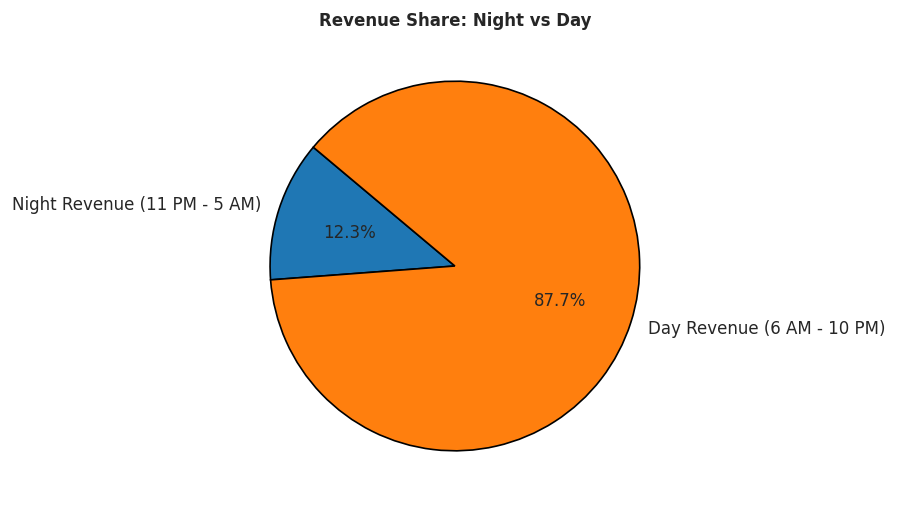

In [162]:
# Labels and values for the pie chart
labels = ['Night Revenue (11 PM - 5 AM)', 'Day Revenue (6 AM - 10 PM)']
values = [night_revenue_share, day_revenue_share]
colors = ['#1f77b4', '#ff7f0e']  # Red-orange for night, green for day

# Create a pie chart
plt.figure(figsize=(5, 5), dpi=120)
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

# Title and styling
plt.title('Revenue Share: Night vs Day', fontsize=10, fontweight='bold')
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

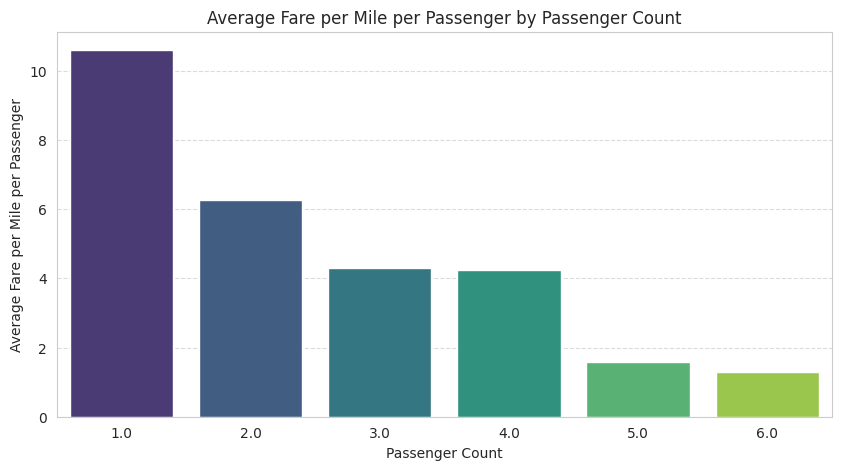

passenger_count  fare_per_mile_per_passenger
0              1.0                    10.601272
1              2.0                     6.273938
2              3.0                     4.302035
3              4.0                     4.239411
4              5.0                     1.581826
5              6.0                     1.279439

In [163]:
# Filter out invalid trip distances
taxi_data_zones_merged = taxi_data_zones_merged.loc[taxi_data_zones_merged['trip_distance'] > 0].copy()

# Compute fare per mile and fare per mile per passenger
taxi_data_zones_merged['fare_per_mile'] = taxi_data_zones_merged['fare_amount'] / taxi_data_zones_merged['trip_distance']
taxi_data_zones_merged['fare_per_mile_per_passenger'] = (
    taxi_data_zones_merged['fare_per_mile'] / taxi_data_zones_merged['passenger_count']
)

# Group by passenger count and compute average fare per mile per passenger
avg_fare_per_mile_per_passenger = taxi_data_zones_merged.groupby('passenger_count', as_index=False).agg(
    {'fare_per_mile_per_passenger': 'mean'}
)

# **Plotting the results**
plt.figure(figsize=(10, 5))
sns.barplot(
    data=avg_fare_per_mile_per_passenger,
    x='passenger_count',
    y='fare_per_mile_per_passenger',
    palette='viridis'
)
plt.xlabel("Passenger Count")
plt.ylabel("Average Fare per Mile per Passenger")
plt.title("Average Fare per Mile per Passenger by Passenger Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()
avg_fare_per_mile_per_passenger

In [164]:
taxi_data_zones_merged.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_month',
       'quarter', 'trip_duration', 'OBJECTID', 'Shape_Leng', 'Shape_Area',
       'zone', 'LocationID', 'borough', 'geometry', 'trip_duration_hours',
       'pickup_hour', 'pickup_day', 'dropoff_hour', 'fare_per_mile',
       'fare_per_mile_per_passenger'],
      dtype='object')

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

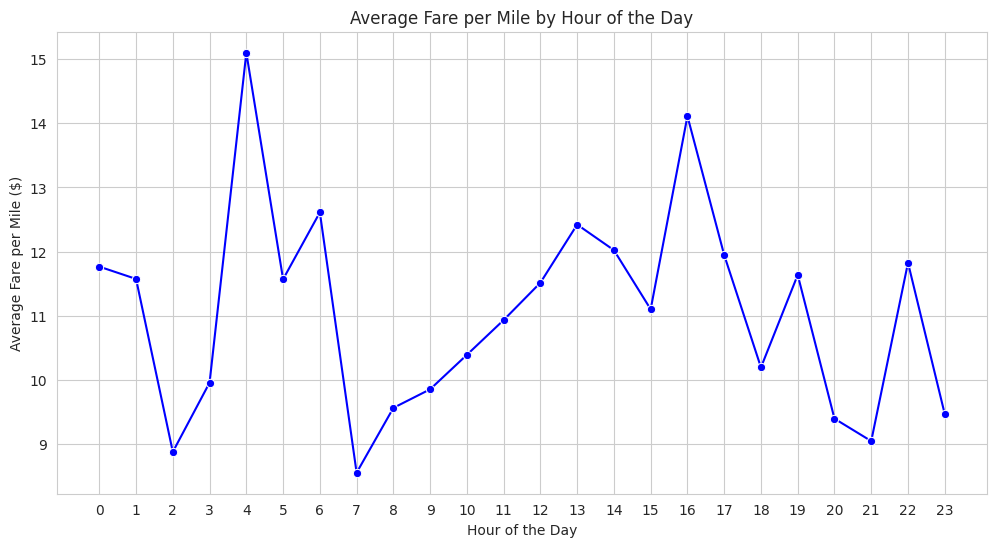

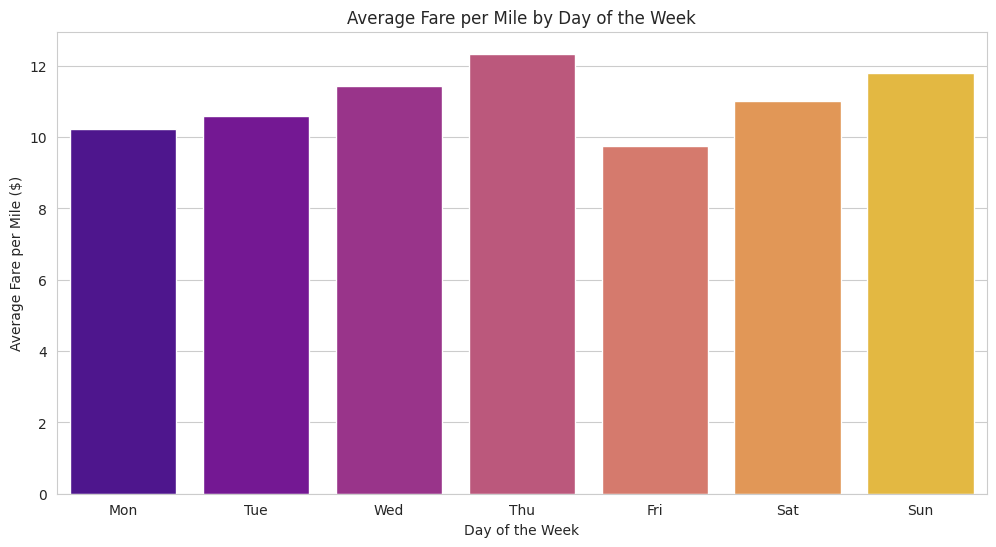

In [165]:
# Compare the average fare per mile for different days and for different times of the day

# Group by hour of the day and calculate average fare per mile
avg_fare_by_hour = taxi_data_zones_merged.groupby('pickup_hour')['fare_per_mile'].mean()

# Group by day of the week and calculate average fare per mile
avg_fare_by_day = taxi_data_zones_merged.groupby('pickup_day')['fare_per_mile'].mean()

# Plot the average fare per mile by hour of day
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_fare_by_hour.index, y=avg_fare_by_hour.values, marker='o', color='blue')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Hour of the Day")
plt.xticks(range(0, 24), labels=[f"{i}" for i in range(0, 24)])
plt.show()

# Plot the average fare per mile by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_fare_by_day.index, y=avg_fare_by_day.values, palette="plasma")
plt.xlabel("Day of the Week")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Day of the Week")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

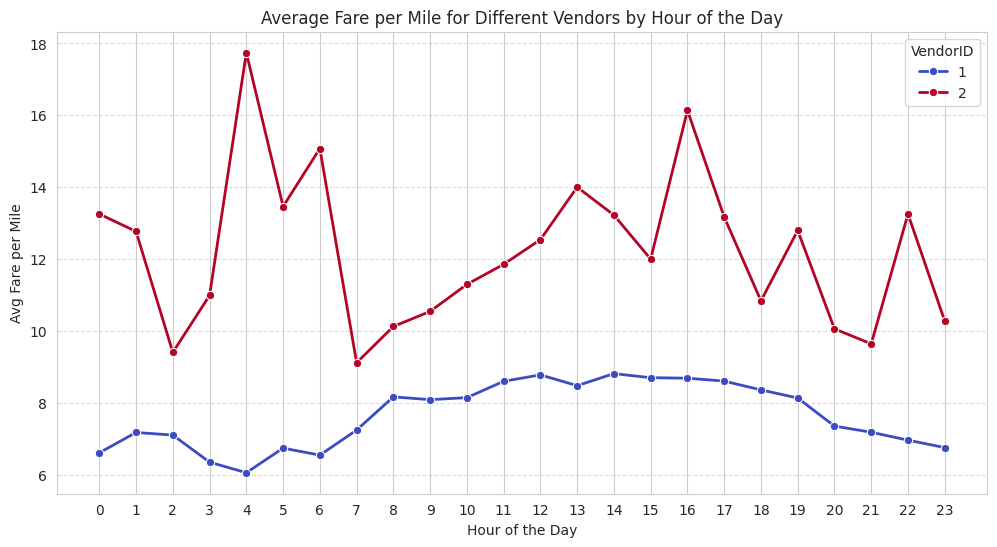

In [166]:
# Compare fare per mile for different vendors
fare_by_vendor_hour = taxi_data_zones_merged.groupby(["VendorID", "pickup_hour"])["fare_per_mile"].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x="pickup_hour", y="fare_per_mile", hue="VendorID", data=fare_by_vendor_hour,
    marker="o", palette="coolwarm", linewidth=2, ci=95  # Adding confidence interval
)

# Formatting
plt.xlabel("Hour of the Day")
plt.ylabel("Avg Fare per Mile")
plt.title("Average Fare per Mile for Different Vendors by Hour of the Day")
plt.xticks(range(0, 24))
plt.legend(title="VendorID")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Dotted gridlines for better readability

plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


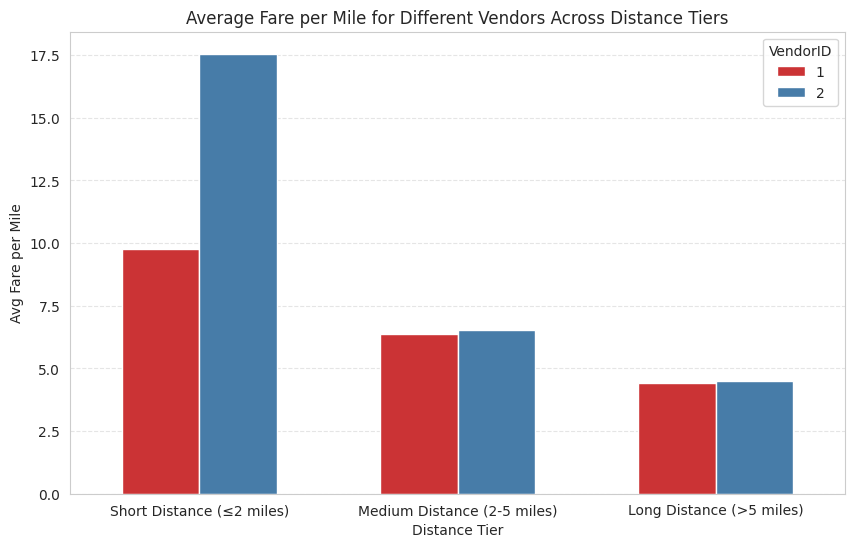

In [167]:
# Define distance categories
def categorize_distance(distance):
    if distance <= 2:
        return "Short Distance (≤2 miles)"
    elif 2 < distance <= 5:
        return "Medium Distance (2-5 miles)"
    else:
        return "Long Distance (>5 miles)"

# Apply categorization
taxi_data_zones_merged["distance_tier"] = taxi_data_zones_merged["trip_distance"].apply(categorize_distance)

# Ensure correct categorical order
distance_order = ["Short Distance (≤2 miles)", "Medium Distance (2-5 miles)", "Long Distance (>5 miles)"]
taxi_data_zones_merged["distance_tier"] = pd.Categorical(taxi_data_zones_merged["distance_tier"], categories=distance_order, ordered=True)

# Group by VendorID & Distance Tier
fare_by_vendor_tier = taxi_data_zones_merged.groupby(["VendorID", "distance_tier"], as_index=False).agg(
    {"fare_per_mile": "mean"}
)

# Create grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="distance_tier", y="fare_per_mile", hue="VendorID", data=fare_by_vendor_tier, palette="Set1", dodge=True, width = .6)

# Formatting
plt.xlabel("Distance Tier")
plt.ylabel("Avg Fare per Mile")
plt.title("Average Fare per Mile for Different Vendors Across Distance Tiers")
plt.legend(title="VendorID")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [168]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
taxi_data_zones_merged['tip_percentage'] = (taxi_data_zones_merged['tip_amount'] / taxi_data_zones_merged['fare_amount']) * 100

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

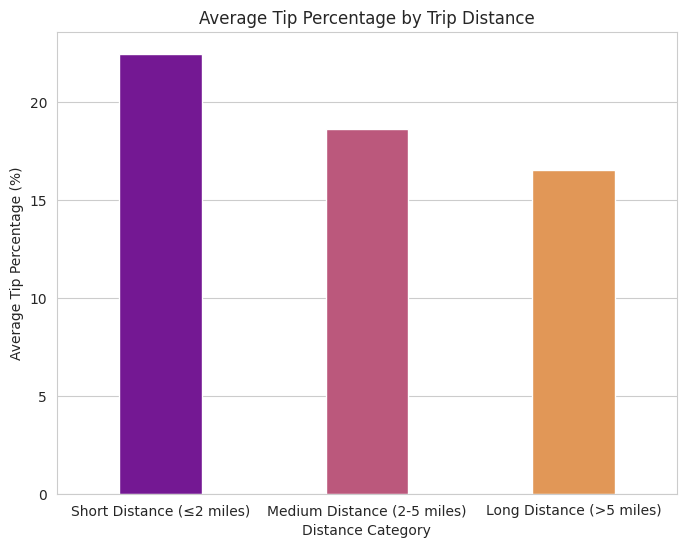

In [179]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Calculate the average tip percentage by distance category
avg_tip_by_distance = taxi_data_zones_merged.groupby('distance_tier')['tip_percentage'].mean().reset_index()


# Plot the average tip percentage by distance category
plt.figure(figsize=(8, 6))
sns.barplot(x="distance_tier", y="tip_percentage", data=avg_tip_by_distance, palette="plasma", width = .4)
plt.xlabel('Distance Category')
plt.ylabel('Average Tip Percentage (%)')
plt.title('Average Tip Percentage by Trip Distance')
plt.xticks(rotation=0)
plt.show()



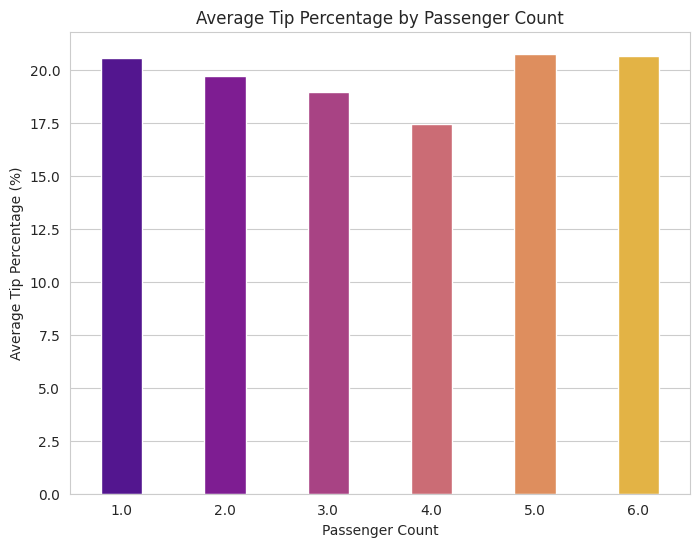

In [169]:
# Calculate the average tip percentage by passenger count
avg_tip_by_passenger_count = taxi_data_zones_merged.groupby('passenger_count')['tip_percentage'].mean().reset_index()

# Plot the average tip percentage by passenger count
plt.figure(figsize=(8, 6))
sns.barplot(x="passenger_count", y="tip_percentage", data=avg_tip_by_passenger_count, palette="plasma", width = .4)
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage (%)')
plt.title('Average Tip Percentage by Passenger Count')
plt.xticks(rotation=0)
plt.show()


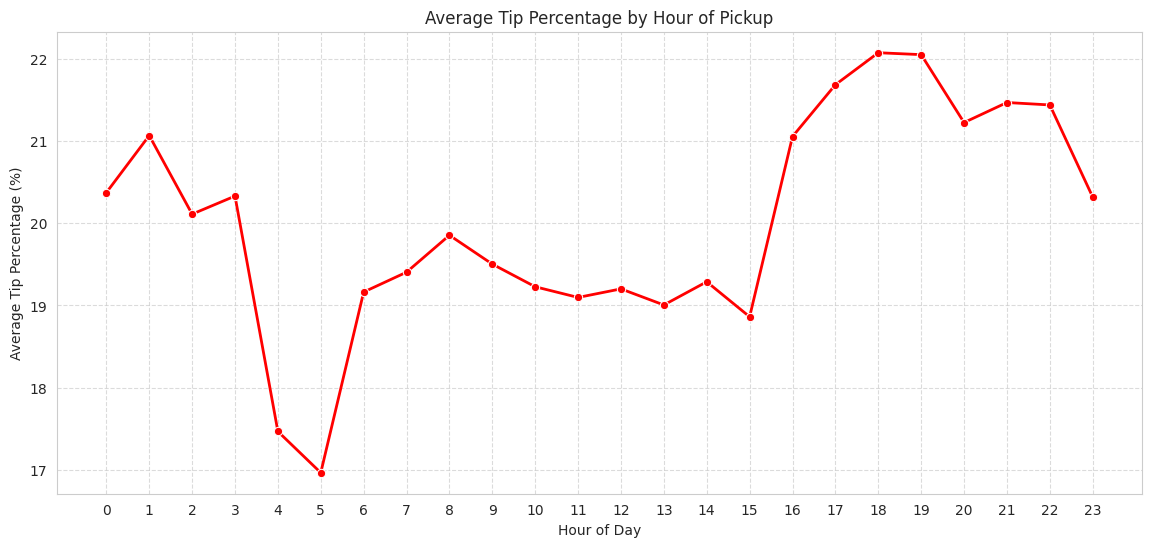

In [170]:
# Calculate the average tip percentage by hour of pickup
avg_tip_by_hour = taxi_data_zones_merged.groupby('pickup_hour')['tip_percentage'].mean().reset_index()

# Plot the average tip percentage by hour of the day
plt.figure(figsize=(14, 6))
sns.lineplot(data=avg_tip_by_hour, x="pickup_hour", y="tip_percentage", marker="o", color="red", linewidth=2)
plt.xlabel('Hour of Day')
plt.ylabel('Average Tip Percentage (%)')
plt.title('Average Tip Percentage by Hour of Pickup')
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

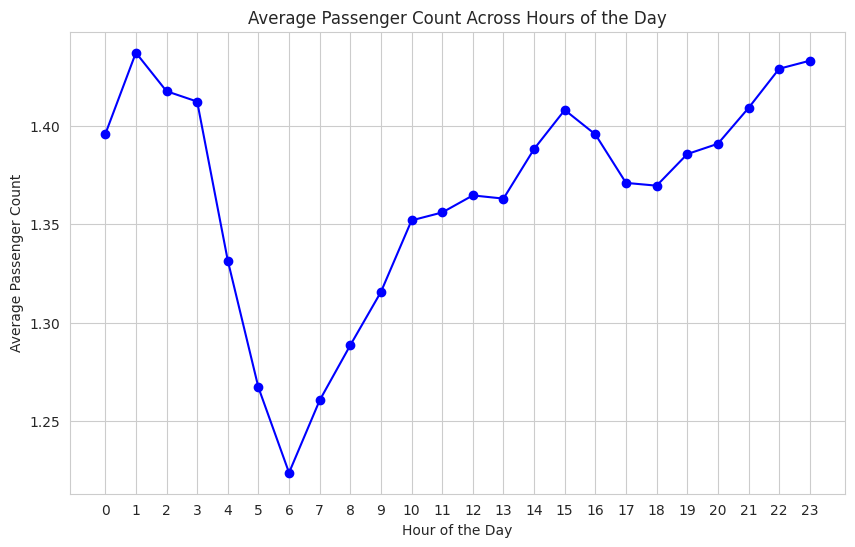

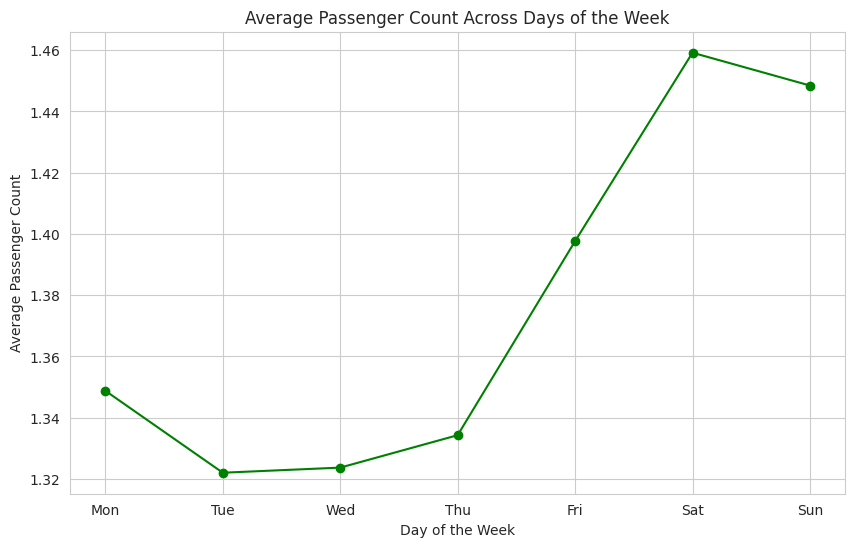

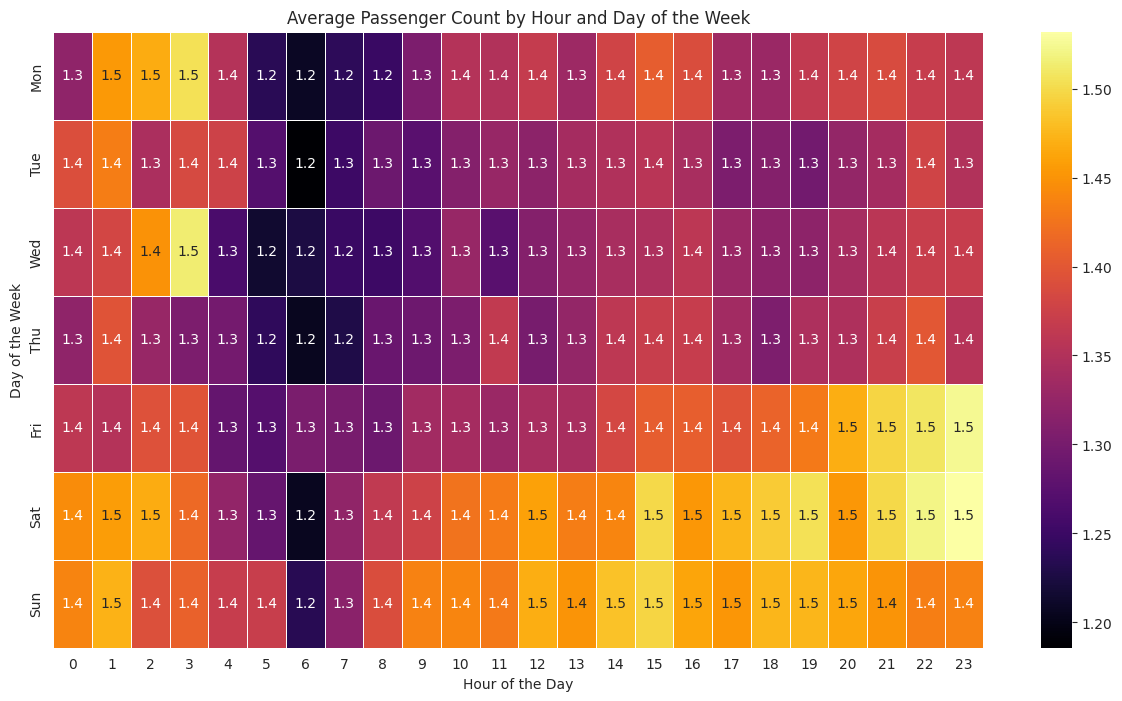

In [171]:
# See how passenger count varies across hours and days
# Group by hour of the day and calculate average passenger count
avg_passenger_by_hour = taxi_data_zones_merged.groupby('pickup_hour')['passenger_count'].mean()

# Group by day of the week and calculate average passenger count
avg_passenger_by_day = taxi_data_zones_merged.groupby('pickup_day')['passenger_count'].mean()

passenger_heatmap = taxi_data_zones_merged.groupby(['pickup_day', 'pickup_hour'])['passenger_count'].mean().unstack()

# Plot the variation of passenger count across hours of the day
plt.figure(figsize=(10, 6))
plt.plot(avg_passenger_by_hour.index, avg_passenger_by_hour.values, marker='o', color='b')
plt.title('Average Passenger Count Across Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')
plt.xticks(range(0, 24))  # Set x-ticks to represent hours of the day (0-23)
plt.grid(True)
plt.show()

# Plot the variation of passenger count across days of the week
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(10, 6))
plt.plot(avg_passenger_by_day.index, avg_passenger_by_day.values, marker='o', color='g')
plt.title('Average Passenger Count Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Passenger Count')
plt.xticks(range(0, 7), days_of_week)  # Set x-ticks to represent days of the week
plt.grid(True)
plt.show()

#Heatmap - Passenger Count by Hour & Day
plt.figure(figsize=(15, 8))
sns.heatmap(passenger_heatmap, cmap="inferno", annot=True, fmt=".1f", linewidths=0.5, xticklabels=range(0, 24), yticklabels=days_of_week)
plt.title("Average Passenger Count by Hour and Day of the Week")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

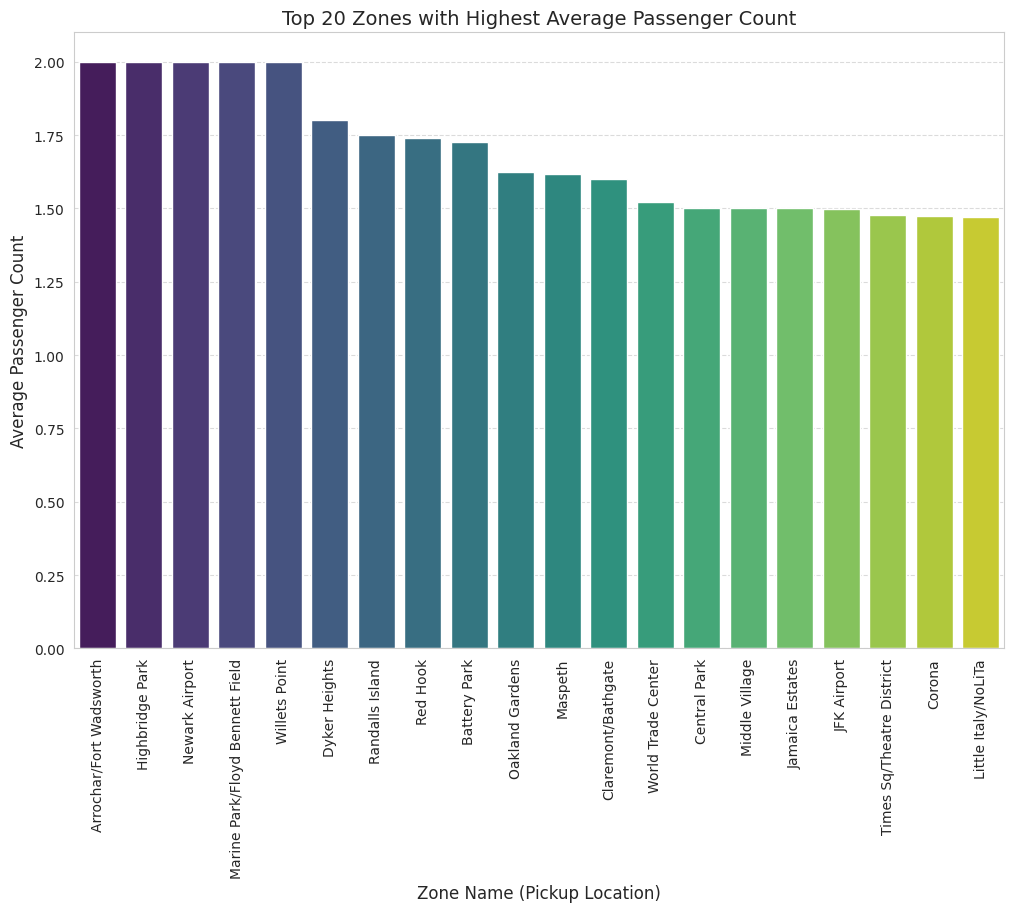

In [172]:
# How does passenger count vary across zones
# Group by 'zone' and calculate average passenger count
avg_passenger_by_zone = taxi_data_zones_merged.groupby('zone')['passenger_count'].mean()

# Sort in descending order for better visualization
avg_passenger_by_zone_sorted = avg_passenger_by_zone.sort_values(ascending=False).reset_index()

# **Plot top 20 zones with highest average passenger count**
plt.figure(figsize=(12, 8))
sns.barplot(x="zone", y="passenger_count", data=avg_passenger_by_zone_sorted.head(20), palette="viridis")

# Formatting
plt.title("Top 20 Zones with Highest Average Passenger Count", fontsize=14)
plt.xlabel("Zone Name (Pickup Location)", fontsize=12)
plt.ylabel("Average Passenger Count", fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()




In [173]:
taxi_data_zones_merged.columns.to_list()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'pickup_month',
 'quarter',
 'trip_duration',
 'OBJECTID',
 'Shape_Leng',
 'Shape_Area',
 'zone',
 'LocationID',
 'borough',
 'geometry',
 'trip_duration_hours',
 'pickup_hour',
 'pickup_day',
 'dropoff_hour',
 'fare_per_mile',
 'fare_per_mile_per_passenger',
 'distance_tier',
 'tip_percentage']

In [174]:
# Drop duplicate columns
taxi_data_zones_merged = taxi_data_zones_merged.drop(columns=['LocationID_dropoff', 'zone_dropoff'], errors='ignore')

# Verify that the columns are removed
print(taxi_data_zones_merged.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_month',
       'quarter', 'trip_duration', 'OBJECTID', 'Shape_Leng', 'Shape_Area',
       'zone', 'LocationID', 'borough', 'geometry', 'trip_duration_hours',
       'pickup_hour', 'pickup_day', 'dropoff_hour', 'fare_per_mile',
       'fare_per_mile_per_passenger', 'distance_tier', 'tip_percentage'],
      dtype='object')


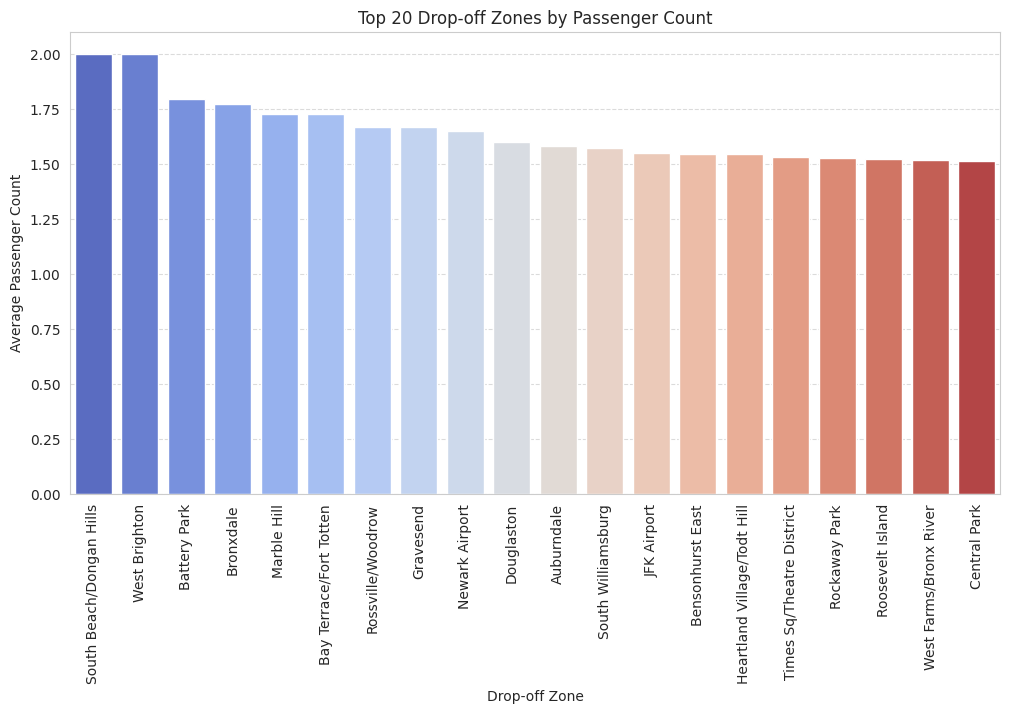

In [175]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
# Create a mapping of LocationID to Zone Name
location_to_zone = taxi_data_zones_merged[['LocationID', 'zone']].drop_duplicates()

# Merge drop-off location names into the dataset
taxi_data_zones_merged = taxi_data_zones_merged.merge(location_to_zone, left_on="DOLocationID", right_on="LocationID", how="left", suffixes=("", "_dropoff"))
# Group by Drop-off Zone Name instead of ID
avg_passenger_by_dropoff = taxi_data_zones_merged.groupby("zone_dropoff")["passenger_count"].mean().reset_index()

# Sort in descending order
avg_passenger_by_dropoff_sorted = avg_passenger_by_dropoff.sort_values(by="passenger_count", ascending=False)

# Plot top 20 drop-off zones
plt.figure(figsize=(12, 6))
sns.barplot(x="zone_dropoff", y="passenger_count", data=avg_passenger_by_dropoff_sorted.head(20), palette="coolwarm")
plt.xlabel("Drop-off Zone")
plt.ylabel("Average Passenger Count")
plt.title("Top 20 Drop-off Zones by Passenger Count")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

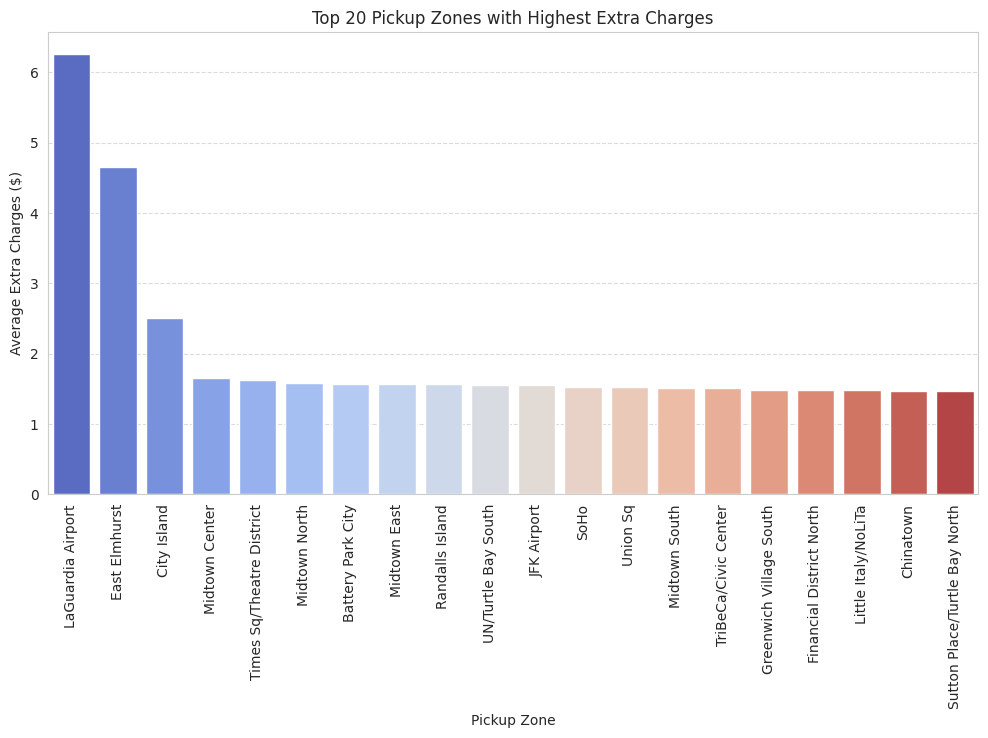

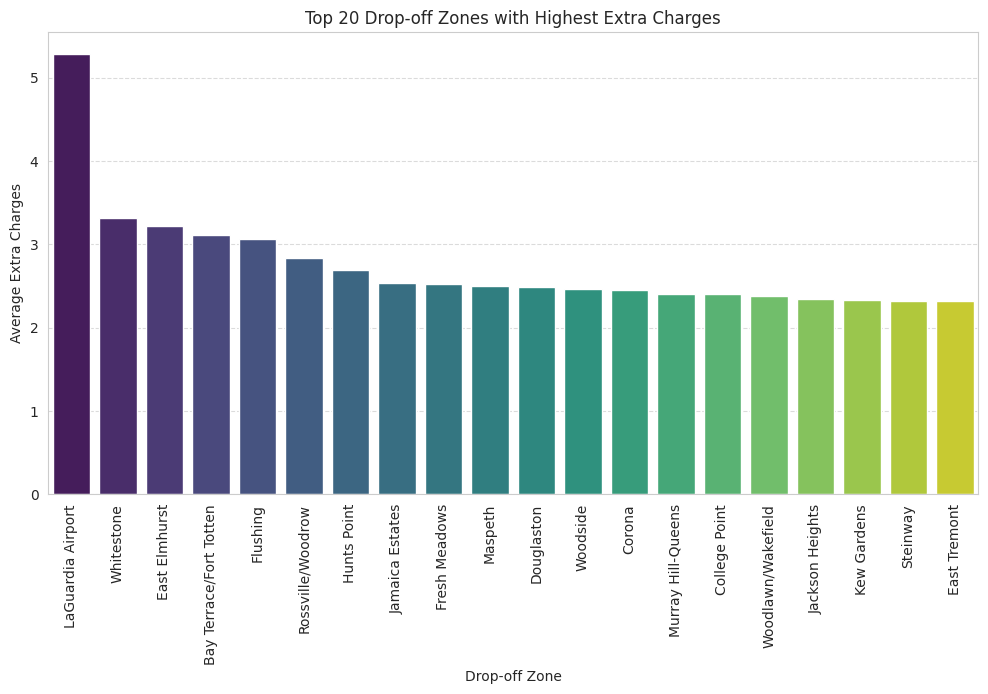

In [176]:
# How often is each surcharge applied?
# Calculate total extra charges per pickup zone
extra_by_pickup = taxi_data_zones_merged.groupby("zone")["extra"].mean().reset_index()

# Sort in descending order
extra_by_pickup_sorted = extra_by_pickup.sort_values(by="extra", ascending=False)

# Plot top 20 zones with highest extra charges
plt.figure(figsize=(12, 6))
sns.barplot(x="zone", y="extra", data=extra_by_pickup_sorted.head(20), palette="coolwarm")
plt.xlabel("Pickup Zone")
plt.ylabel("Average Extra Charges ($)")
plt.title("Top 20 Pickup Zones with Highest Extra Charges")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Repeat for drop-off zones
extra_by_dropoff = taxi_data_zones_merged.groupby("zone_dropoff")["extra"].mean().reset_index()
extra_by_dropoff_sorted = extra_by_dropoff.sort_values(by="extra", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="zone_dropoff", y="extra", data=extra_by_dropoff_sorted.head(20), palette="viridis")
plt.xlabel("Drop-off Zone")
plt.ylabel("Average Extra Charges")
plt.title("Top 20 Drop-off Zones with Highest Extra Charges")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()




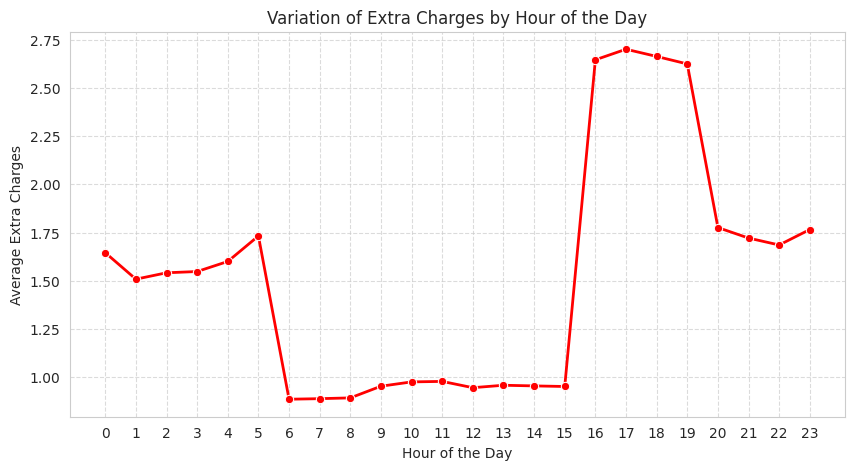

In [177]:
# Group by hour of the day and calculate average extra charges
extra_by_hour = taxi_data_zones_merged.groupby("pickup_hour")["extra"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=extra_by_hour, x="pickup_hour", y="extra", marker="o", color="r", linewidth=2)
plt.xlabel("Hour of the Day")
plt.ylabel("Average Extra Charges")
plt.title("Variation of Extra Charges by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


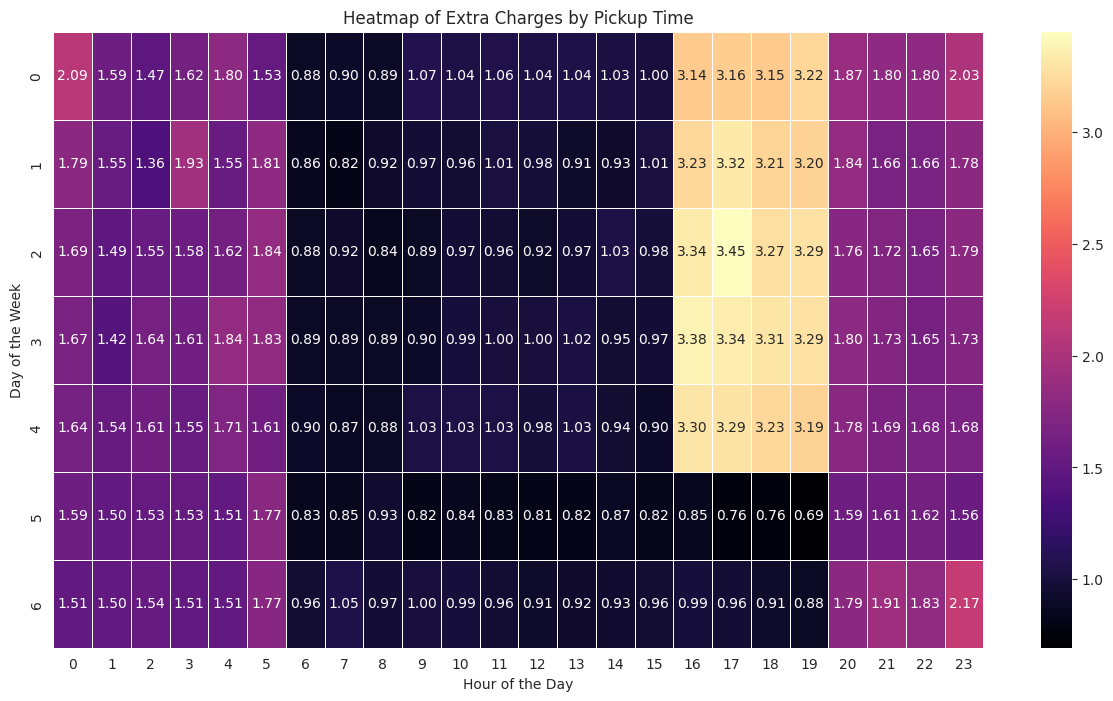

In [178]:
# Group by pickup day and hour to calculate average extra charges
extra_heatmap_data = taxi_data_zones_merged.groupby(["pickup_day", "pickup_hour"])["extra"].mean().unstack()

# Create heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(extra_heatmap_data, cmap="magma", annot=True, fmt=".2f", linewidths=0.5)
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Heatmap of Extra Charges by Pickup Time")
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

High demand zones: Manhattan consistently saw the highest number of pickups and drop-offs, especially around Midtown and Lower Manhattan.

Time of day: Peak demand was observed during morning (7–10 AM) and evening rush hours (5–8 PM).

Day of week: Fridays had the highest volume of rides, followed closely by Thursdays. Weekends saw lower rides but higher average fares, possibly due to leisure travel.

Trip duration and distance: Trips were generally short in distance and time in high-density areas, while longer trips often involved airport routes or outer boroughs.

Fare analysis: There were instances of negative or zero fare amounts, which were filtered or corrected. Fare distribution was right-skewed, indicating a majority of low-fare trips.

Airport-related trips: JFK and LaGuardia trips formed a significant chunk of long-distance rides, often including additional airport fees.

Operational inefficiencies: Idle pickups (zero passengers or multiple zero-amount transactions) hint at either data anomalies or non-revenue rides (possibly test data or rebalancing trips).

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

##Recommendations to Optimize Routing and Dispatching

Demand-based routing: Use historical demand patterns to proactively position taxis around Midtown, Wall Street, and Times Square during office hours.

Avoid dead miles: Optimize return routes from outer boroughs (Bronx, Staten Island) using shared trip pooling to minimize empty returns.

Event-based surge prediction: Incorporate public event calendars (concerts, parades) to predict high-volume times and redirect fleet accordingly.

Traffic-aware dispatching: Integrate real-time traffic feeds to dynamically route taxis and avoid congestion-prone zones during peak hours.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

##Strategic Positioning of Cabs

Zonal deployment: Allocate a higher density of taxis to zones like Midtown and Lower Manhattan during business hours, and shift focus to Upper East/West and Brooklyn during evening hours.

Airport positioning: Keep a dedicated taxi pool near JFK and LGA with predictive modeling of incoming flight volumes to reduce passenger wait time.

Off-peak distribution: Redistribute taxis during late-night and early-morning hours to entertainment zones (e.g., Brooklyn nightlife spots) where limited availability causes customer drop-off.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

##Data-Driven Pricing Strategy

Dynamic pricing by time and zone: Implement tiered pricing during peak hours (morning/evening) and for airport routes to reflect higher demand and wait times.

Incentivize off-peak rides: Offer discounts or fixed fare rides during non-peak hours or from underutilized zones to boost usage.

Minimum fare threshold: Apply a minimum fare to avoid revenue loss from ultra-short trips, especially those under 1 km.

Transparency and competition: Regularly benchmark against Uber/Lyft pricing for the same zones and durations to maintain competitiveness.